<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Projeto_de_Estudo_Estrutura_de_Dados_Grafos/blob/main/Grafos_Prim_Kruskal_Djikstra_Bellman_Ford_Ford_Fulkerson_Tarjan_Kosaraju_Colora%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color=lightgreen>Estrutura de Dados Grafos:

##<font color=lightgreen>As estruturas de dados grafos são representações matemáticas de conjuntos de objetos (vértices) e as relações (arestas) entre eles. Em grafos, existem vários algoritmos que têm aplicações específicas para resolver problemas práticos e teóricos em áreas como redes, caminhos, conectividade e otimização. Aqui está uma explicação sobre os algoritmos que você mencionou:

#<font color=lightgreen>1. Árvore Geradora Mínima (Minimum Spanning Tree - MST):

##<font color=lightgreen>A Árvore Geradora Mínima é uma árvore subjacente de um grafo não orientado e ponderado que conecta todos os vértices do grafo, sem formar ciclos e com o custo total mínimo possível (a soma dos pesos das arestas é a menor possível).

* Algoritmo de Prim: Começa a partir de um vértice arbitrário e vai expandindo a árvore com a aresta de menor peso que conecta um vértice da árvore a um vértice fora dela.

* Algoritmo de Kruskal: Ordena todas as arestas do grafo por peso e as adiciona à árvore de forma incremental, garantindo que não haja ciclos.

#<font color=lightgreen>2. Caminho Mínimo (Shortest Path):

##<font color=lightgreen>Algoritmos de caminho mínimo são usados para encontrar a sequência de vértices que conecta dois pontos de um grafo, com o menor custo (peso total das arestas).

* Algoritmo de Dijkstra: Resolve o problema de caminho mínimo em grafos com arestas de peso não negativo. Funciona de forma gananciosa, selecionando repetidamente o vértice com o menor custo acumulado e expandindo seus vizinhos.

* Algoritmo de Bellman-Ford: Pode lidar com arestas de peso negativo e também detecta ciclos negativos no grafo. Funciona relaxando repetidamente todas as arestas do grafo, até que os menores caminhos sejam encontrados.

##<font color=lightgreen>3. Fluxo Máximo (Maximum Flow):

#<font color=lightgreen>O problema de fluxo máximo envolve encontrar o maior fluxo possível de uma fonte para um sumidouro em uma rede de grafos, onde as arestas têm capacidades.

* Algoritmo de Ford-Fulkerson: Usa uma abordagem iterativa para encontrar caminhos de aumento no grafo de fluxo e incrementar o fluxo total até não ser mais possível aumentar o fluxo. Embora eficiente, pode ser lento em casos com capacidades irracionais, a menos que seja combinado com o algoritmo de Edmonds-Karp.

#<font color=lightgreen>4. Conexão Forte (Strongly Connected Components - SCC):

##<font color=lightgreen>Em um grafo dirigido, conexões fortes significam que existe um caminho entre qualquer par de vértices em ambas as direções (de A para B e de B para A). O problema é identificar essas conexões em grafos direcionados.

* Algoritmo de Tarjan: Usa uma abordagem de busca em profundidade (DFS) para encontrar as componentes fortemente conectadas. Ele mantém um conjunto de vértices que foram visitados e uma pilha para rastrear os vértices em andamento.

* Algoritmo de Kosaraju: Também usa busca em profundidade, mas em duas fases. Primeiro, percorre o grafo e registra a ordem de término dos vértices. Depois, inverte o grafo e faz uma DFS nos vértices na ordem de término para encontrar as SCCs.

##<font color=lightgreen>5. Coloração de Grafos:

#<font color=lightgreen>A coloração de grafos é o problema de atribuir cores aos vértices de um grafo de forma que nenhum par de vértices adjacentes compartilhe a mesma cor. Esse problema é importante em áreas como otimização de recursos, como em agendamento de tarefas.

* Algoritmo de Coloração: Existem várias abordagens para este problema, geralmente baseadas em heurísticas e busca. O objetivo é determinar o número mínimo de cores necessárias (ou uma boa aproximação) para colorir o grafo, o que é conhecido como o problema da coloração mínima. Algoritmos clássicos tentam minimizar o número de cores usando abordagens gananciosas ou backtracking.

##<font color=lightgreen>Esses algoritmos são fundamentais para a resolução de problemas de otimização, redes e análise de grafos em computação, e são aplicados em áreas como comunicação de redes, planejamento de rotas, design de circuitos, etc.

#<font color=lightgreen>Prim

Este código usa uma representação de grafo como uma lista de adjacência e a biblioteca heapq para tornar a seleção da próxima aresta mínima mais eficiente.

##Explicação do Código:

1 Grafo e Arestas: O grafo é representado como uma lista de adjacência, onde cada entrada contém uma lista de tuplas (peso, vértice).

2 Algoritmo de Prim:

Começa no vértice 0 e utiliza uma fila de prioridade (heap mínimo) para armazenar as arestas com os pesos mais baixos.

Para cada vértice, seleciona a menor aresta que conecta um vértice dentro da árvore a um fora dela.

3 Resultado:

mst_arestas: Contém as arestas da árvore geradora mínima.

mst_custo: O custo total da MST.

In [ ]:
import heapq

class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.grafo = [[] for _ in range(vertices)]  # Lista de adjacência para armazenar o grafo

    def adicionar_aresta(self, u, v, peso):
        # Adiciona uma aresta bidirecional com um peso
        self.grafo[u].append((peso, v))
        self.grafo[v].append((peso, u))

    def prim(self):
        # Inicializando a estrutura para o algoritmo de Prim
        mst_custo = 0
        visitado = [False] * self.V  # Para rastrear os vértices visitados
        mst_arestas = []  # Para armazenar as arestas da árvore geradora mínima

        # Inicializa o heap com o vértice inicial (escolhendo o vértice 0)
        min_heap = [(0, 0, -1)]  # (peso, vértice, pai)

        while min_heap:
            peso, u, pai = heapq.heappop(min_heap)

            if visitado[u]:
                continue

            # Marca o vértice como visitado
            visitado[u] = True
            mst_custo += peso

            if pai != -1:
                mst_arestas.append((pai, u, peso))

            # Adiciona todas as arestas do vértice `u` no heap
            for next_peso, v in self.grafo[u]:
                if not visitado[v]:
                    heapq.heappush(min_heap, (next_peso, v, u))

        return mst_arestas, mst_custo

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(0, 1, 2)
g.adicionar_aresta(0, 3, 6)
g.adicionar_aresta(1, 2, 3)
g.adicionar_aresta(1, 3, 8)
g.adicionar_aresta(1, 4, 5)
g.adicionar_aresta(2, 4, 7)
g.adicionar_aresta(3, 4, 9)

# Executa o algoritmo de Prim
mst_arestas, mst_custo = g.prim()

print("Arestas da Árvore Geradora Mínima:")
for u, v, peso in mst_arestas:
    print(f"{u} -- {v} == {peso}")

print(f"Custo total da MST: {mst_custo}")


Arestas da Árvore Geradora Mínima:
0 -- 1 == 2
1 -- 2 == 3
1 -- 4 == 5
0 -- 3 == 6
Custo total da MST: 16


#<font color=lightgreen>Kruskal

Este código utiliza a estrutura de dados Union-Find (ou Disjoint Set Union, DSU) para ajudar a detectar ciclos e construir a árvore geradora mínima.

Explicação do Código:

1 Estrutura de Dados:

O grafo é representado por uma lista de arestas, onde cada aresta é uma tupla (peso, u, v).

A estrutura Union-Find (encontrar e unir) é usada para detectar se a inclusão de uma aresta criaria um ciclo.

2 Algoritmo de Kruskal:

As arestas são ordenadas pelo peso.

Cada aresta é examinada; se conecta dois vértices de conjuntos diferentes, é adicionada à árvore geradora mínima.

A estrutura Union-Find garante que não haja ciclos.

3 Saída:

mst_arestas: Lista das arestas da MST.
mst_custo: Custo total da MST.

In [ ]:
class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.arestas = []  # Lista de arestas

    def adicionar_aresta(self, u, v, peso):
        # Adiciona uma aresta ao grafo
        self.arestas.append((peso, u, v))

    def encontrar(self, pai, i):
        # Função para encontrar o representante do conjunto do elemento i
        if pai[i] == i:
            return i
        else:
            pai[i] = self.encontrar(pai, pai[i])  # Caminho comprimido
            return pai[i]

    def unir(self, pai, rank, u, v):
        # Função para unir dois subconjuntos
        raiz_u = self.encontrar(pai, u)
        raiz_v = self.encontrar(pai, v)

        # União por rank
        if rank[raiz_u] < rank[raiz_v]:
            pai[raiz_u] = raiz_v
        elif rank[raiz_u] > rank[raiz_v]:
            pai[raiz_v] = raiz_u
        else:
            pai[raiz_v] = raiz_u
            rank[raiz_u] += 1

    def kruskal(self):
        # Inicialização
        mst_arestas = []  # Lista de arestas na árvore geradora mínima
        mst_custo = 0

        # Ordena as arestas pelo peso
        self.arestas.sort()

        # Inicializa os conjuntos disjuntos
        pai = list(range(self.V))
        rank = [0] * self.V

        for peso, u, v in self.arestas:
            # Encontra as raízes dos conjuntos de u e v
            raiz_u = self.encontrar(pai, u)
            raiz_v = self.encontrar(pai, v)

            # Se u e v pertencem a conjuntos diferentes, adiciona a aresta à MST
            if raiz_u != raiz_v:
                mst_arestas.append((u, v, peso))
                mst_custo += peso
                self.unir(pai, rank, raiz_u, raiz_v)

        return mst_arestas, mst_custo

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(0, 1, 2)
g.adicionar_aresta(0, 3, 6)
g.adicionar_aresta(1, 2, 3)
g.adicionar_aresta(1, 3, 8)
g.adicionar_aresta(1, 4, 5)
g.adicionar_aresta(2, 4, 7)
g.adicionar_aresta(3, 4, 9)

# Executa o algoritmo de Kruskal
mst_arestas, mst_custo = g.kruskal()

print("Arestas da Árvore Geradora Mínima:")
for u, v, peso in mst_arestas:
    print(f"{u} -- {v} == {peso}")

print(f"Custo total da MST: {mst_custo}")


Arestas da Árvore Geradora Mínima:
0 -- 1 == 2
1 -- 2 == 3
1 -- 4 == 5
0 -- 3 == 6
Custo total da MST: 16


#<font color=lightgreen>Djikstra

Explicação do Código:

1 Estrutura de Dados:

O grafo é representado como uma lista de adjacência, onde cada entrada contém uma lista de tuplas (peso, vértice).

Um array dist armazena a distância mínima da origem para cada vértice.

2 Algoritmo de Dijkstra:

Inicializamos um min-heap para selecionar o vértice com a menor distância conhecida.

Para cada vértice processado, relaxamos as arestas adjacentes, atualizando a distância se encontrarmos um caminho mais curto.

As distâncias atualizadas são inseridas no heap para que possamos continuar com o próximo vértice de menor distância.

3 Saída:

distancias: Lista das menores distâncias a partir do vértice de origem até todos os outros vértices.

Esse código define um grafo, adiciona arestas, executa o algoritmo de Dijkstra a partir do vértice 0, e imprime as menores distâncias para cada vértice.

In [ ]:
import heapq

class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.grafo = [[] for _ in range(vertices)]  # Lista de adjacência

    def adicionar_aresta(self, u, v, peso):
        # Adiciona uma aresta direcionada do vértice u para o vértice v com um peso
        self.grafo[u].append((peso, v))

    def dijkstra(self, origem):
        # Inicializa as distâncias como infinitas para todos os vértices
        dist = [float('inf')] * self.V
        dist[origem] = 0  # A distância da origem para ela mesma é 0

        # Min-heap para processar o próximo vértice com a menor distância conhecida
        min_heap = [(0, origem)]  # (distância, vértice)

        while min_heap:
            distancia_atual, u = heapq.heappop(min_heap)

            # Se a distância atual é maior do que a registrada, continue
            if distancia_atual > dist[u]:
                continue

            # Verifica todos os vizinhos do vértice `u`
            for peso, v in self.grafo[u]:
                # Relaxamento: Verifica se encontramos um caminho menor para `v`
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(min_heap, (dist[v], v))

        return dist

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(0, 1, 2)
g.adicionar_aresta(0, 3, 6)
g.adicionar_aresta(1, 2, 3)
g.adicionar_aresta(1, 3, 8)
g.adicionar_aresta(1, 4, 5)
g.adicionar_aresta(2, 4, 7)
g.adicionar_aresta(3, 4, 9)

# Define o vértice de origem
origem = 0
distancias = g.dijkstra(origem)

print(f"Distâncias mínimas a partir do vértice {origem}:")
for i, d in enumerate(distancias):
    print(f"Vértice {i}: {d}")


Distâncias mínimas a partir do vértice 0:
Vértice 0: 0
Vértice 1: 2
Vértice 2: 5
Vértice 3: 6
Vértice 4: 7


#<font color=lightgreen>Bellman-Ford

Explicação do Código:

1 Estrutura de Dados:

O grafo é representado por uma lista de arestas, onde cada aresta é uma tupla (u, v, peso) que representa uma aresta do vértice u para o vértice v com um peso específico.

2 Algoritmo de Bellman-Ford:

Inicializamos a distância da origem para todos os outros vértices como infinita, exceto para a origem, que é 0.

Relaxamos todas as arestas V-1 vezes (onde V é o número de vértices) para garantir que as menores distâncias sejam encontradas.

Após V-1 iterações, verificamos a presença de ciclos negativos. Se uma aresta puder ser relaxada novamente, isso indica a presença de um ciclo de peso negativo.

3 Saída:

distancias: Contém as menores distâncias da origem para todos os outros vértices, se não houver ciclos negativos.

Se um ciclo negativo é detectado, o algoritmo imprime uma mensagem e retorna None.

Esse código cria um grafo, adiciona arestas (incluindo algumas com pesos negativos), executa o algoritmo de Bellman-Ford a partir do vértice 0, e imprime as menores distâncias para cada vértice. Se houver um ciclo negativo, o código indicará isso.

In [ ]:
class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.arestas = []  # Lista de arestas

    def adicionar_aresta(self, u, v, peso):
        # Adiciona uma aresta do vértice u para o vértice v com um peso
        self.arestas.append((u, v, peso))

    def bellman_ford(self, origem):
        # Inicializa as distâncias como infinito para todos os vértices
        dist = [float('inf')] * self.V
        dist[origem] = 0  # A distância da origem para ela mesma é 0

        # Relaxa todas as arestas V-1 vezes
        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        # Verifica ciclos negativos
        for u, v, peso in self.arestas:
            if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                print("Grafo contém ciclo negativo")
                return None

        return dist

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(0, 1, -1)
g.adicionar_aresta(0, 2, 4)
g.adicionar_aresta(1, 2, 3)
g.adicionar_aresta(1, 3, 2)
g.adicionar_aresta(1, 4, 2)
g.adicionar_aresta(3, 2, 5)
g.adicionar_aresta(3, 1, 1)
g.adicionar_aresta(4, 3, -3)

# Define o vértice de origem
origem = 0
distancias = g.bellman_ford(origem)

if distancias is not None:
    print(f"Distâncias mínimas a partir do vértice {origem}:")
    for i, d in enumerate(distancias):
        print(f"Vértice {i}: {d}")


Distâncias mínimas a partir do vértice 0:
Vértice 0: 0
Vértice 1: -1
Vértice 2: 2
Vértice 3: -2
Vértice 4: 1


#<font color=lightgreen>Ford-Fulkerson

Explicação do Código

1 Estrutura de Dados:

O grafo é representado como um defaultdict de defaultdicts, onde cada chave é um vértice e cada valor é a capacidade da aresta para outro vértice.

Um grafo residual é usado para armazenar as capacidades restantes após cada envio de fluxo.

2 Busca em Profundidade (DFS):

O método _dfs tenta encontrar um caminho aumentante da fonte até o sumidouro, considerando apenas as arestas com capacidade positiva.

Ao encontrar um caminho, o fluxo é retornado e as capacidades residuais são ajustadas para o caminho utilizado.

3 Algoritmo Ford-Fulkerson:

Executa uma série de buscas DFS enquanto houver um caminho aumentante da fonte ao sumidouro.

O fluxo total máximo (fluxo_max) é atualizado com o valor do fluxo encontrado em cada iteração.

4 Saída:

fluxo_maximo: Fluxo máximo da fonte ao sumidouro.

O código imprime o fluxo encontrado em cada caminho aumentante.

Esse código define um grafo com algumas arestas e capacidades, executa o algoritmo de Ford-Fulkerson para calcular o fluxo máximo da fonte 0 ao sumidouro 5, e exibe o resultado final.

In [ ]:
from collections import defaultdict

class GrafoFluxo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices no grafo
        self.grafo = defaultdict(lambda: defaultdict(int))  # Grafo residual

    def adicionar_aresta(self, u, v, capacidade):
        # Adiciona uma aresta ao grafo com uma capacidade inicial
        self.grafo[u][v] += capacidade

    def _dfs(self, u, t, visitado, caminho):
        # Executa uma DFS para encontrar um caminho da fonte `s` ao sumidouro `t`
        visitado[u] = True
        if u == t:
            return caminho

        for v, capacidade in self.grafo[u].items():
            if not visitado[v] and capacidade > 0:
                fluxo_min = min(caminho, capacidade)
                result = self._dfs(v, t, visitado, fluxo_min)
                if result > 0:
                    self.grafo[u][v] -= result
                    self.grafo[v][u] += result
                    return result
        return 0

    def ford_fulkerson(self, fonte, sumidouro):
        fluxo_max = 0

        while True:
            # Marca todos os vértices como não visitados para a próxima iteração
            visitado = [False] * self.V

            # Executa uma DFS para encontrar um caminho aumentante
            fluxo = self._dfs(fonte, sumidouro, visitado, float('Inf'))

            if fluxo == 0:  # Se não há fluxo, terminamos
                break

            fluxo_max += fluxo
            print(f"Caminho aumentante encontrado com fluxo = {fluxo}")

        return fluxo_max

# Exemplo de uso
g = GrafoFluxo(6)
g.adicionar_aresta(0, 1, 16)
g.adicionar_aresta(0, 2, 13)
g.adicionar_aresta(1, 2, 10)
g.adicionar_aresta(1, 3, 12)
g.adicionar_aresta(2, 1, 4)
g.adicionar_aresta(2, 4, 14)
g.adicionar_aresta(3, 2, 9)
g.adicionar_aresta(3, 5, 20)
g.adicionar_aresta(4, 3, 7)
g.adicionar_aresta(4, 5, 4)

# Define o vértice de origem (fonte) e o sumidouro (destino)
fonte = 0
sumidouro = 5
fluxo_maximo = g.ford_fulkerson(fonte, sumidouro)

print(f"O fluxo máximo de {fonte} para {sumidouro} é: {fluxo_maximo}")


Caminho aumentante encontrado com fluxo = 7
Caminho aumentante encontrado com fluxo = 3
Caminho aumentante encontrado com fluxo = 1
Caminho aumentante encontrado com fluxo = 5
Caminho aumentante encontrado com fluxo = 6
Caminho aumentante encontrado com fluxo = 1
O fluxo máximo de 0 para 5 é: 23


#<font color=lightgreen>Tarjan

Explicação do Código:

1 Estrutura de Dados:

O grafo é representado como uma lista de adjacências usando defaultdict(list).

As listas discovery e low armazenam, respectivamente, o tempo de descoberta de cada vértice e o menor tempo de descoberta alcançável.

stack mantém uma pilha dos vértices que ainda não foram atribuídos a uma componente.

on_stack é um vetor booleano que indica se um vértice está na pilha para ajudar na detecção de ciclos.

2 Função Recursiva _tarjan_util:

Atualiza os valores de descoberta e low para cada vértice e explora seus adjacentes.

Ao identificar o vértice raiz de uma componente fortemente conectada, remove os vértices da pilha até formar uma SCC.

3 Função Principal tarjan:

Itera sobre todos os vértices para garantir que todos sejam visitados.
Retorna a lista scc com todas as componentes fortemente conectadas do grafo.

4 Exemplo de Uso:

Um grafo de 5 vértices é criado com arestas direcionadas.

Após a execução do algoritmo, imprime as componentes fortemente conectadas encontradas.

Esse código imprime cada componente fortemente conectada encontrada no grafo, sendo útil para identificar agrupamentos de vértices onde cada vértice é alcançável a partir de qualquer outro vértice dentro da mesma componente.

In [ ]:
from collections import defaultdict

class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.grafo = defaultdict(list)  # Lista de adjacências
        self.tempo = 0  # Tempo de descoberta

    def adicionar_aresta(self, u, v):
        # Adiciona uma aresta do vértice u para o vértice v
        self.grafo[u].append(v)

    def _tarjan_util(self, u, discovery, low, stack, on_stack, scc):
        # Inicializa o tempo de descoberta e a menor visita
        discovery[u] = low[u] = self.tempo
        self.tempo += 1
        stack.append(u)
        on_stack[u] = True

        # Explora todos os vértices adjacentes
        for v in self.grafo[u]:
            if discovery[v] == -1:  # Se v não foi visitado
                self._tarjan_util(v, discovery, low, stack, on_stack, scc)
                low[u] = min(low[u], low[v])
            elif on_stack[v]:  # Se v está na pilha, então temos um ciclo
                low[u] = min(low[u], discovery[v])

        # Se u é a raiz de uma componente fortemente conectada
        if low[u] == discovery[u]:
            componente = []
            while stack:
                v = stack.pop()
                on_stack[v] = False
                componente.append(v)
                if v == u:
                    break
            scc.append(componente)

    def tarjan(self):
        discovery = [-1] * self.V  # Marca de descoberta dos vértices
        low = [-1] * self.V  # Menor vértice acessível
        stack = []  # Pilha para armazenar vértices
        on_stack = [False] * self.V  # Vértices na pilha
        scc = []  # Lista de componentes fortemente conectadas

        for u in range(self.V):
            if discovery[u] == -1:
                self._tarjan_util(u, discovery, low, stack, on_stack, scc)

        return scc

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(1, 0)
g.adicionar_aresta(0, 2)
g.adicionar_aresta(2, 1)
g.adicionar_aresta(0, 3)
g.adicionar_aresta(3, 4)

# Executa o algoritmo de Tarjan e imprime as componentes fortemente conectadas
scc = g.tarjan()
print("Componentes fortemente conectadas (SCCs):")
for componente in scc:
    print(componente)


Componentes fortemente conectadas (SCCs):
[4]
[3]
[1, 2, 0]


#<font color=lightgreen>Kosaraju

Explicação do Código:

1 Estrutura de Dados:

Utilizamos um defaultdict(list) para representar o grafo, com listas de adjacência para cada vértice.

2 Passo 1 (Primeira DFS):

Realizamos uma DFS em todo o grafo e empilhamos os vértices na ordem em que a DFS é concluída para cada vértice. Essa ordem será usada para explorar o grafo transposto.

3 Passo 2 (Transposição do Grafo):

Criamos o grafo transposto, onde todas as arestas são invertidas. A função _transpor_grafo devolve um novo grafo com essas arestas invertidas.

4 Passo 3 (Segunda DFS no Grafo Transposto):

Usamos a pilha gerada no Passo 1 para realizar uma DFS no grafo transposto. Cada vez que iniciamos uma nova DFS, obtemos uma componente fortemente conectada.

Cada componente é armazenada na lista scc.

5 Exemplo de Uso:

Criamos um grafo com 5 vértices e algumas arestas direcionadas.

Após a execução do algoritmo, o código imprime cada componente fortemente conectada encontrada no grafo.

Esse código fornece uma maneira eficiente de identificar agrupamentos de vértices em que cada vértice pode alcançar qualquer outro dentro da mesma componente, utilizando o algoritmo de Kosaraju.

In [ ]:
from collections import defaultdict

class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.grafo = defaultdict(list)  # Lista de adjacências do grafo

    def adicionar_aresta(self, u, v):
        # Adiciona uma aresta direcionada do vértice u para o vértice v
        self.grafo[u].append(v)

    def _dfs(self, v, visitado, stack=None):
        # Executa DFS a partir do vértice `v`, adicionando à pilha ao final
        visitado[v] = True
        for i in self.grafo[v]:
            if not visitado[i]:
                self._dfs(i, visitado, stack)
        if stack is not None:
            stack.append(v)

    def _transpor_grafo(self):
        # Cria o grafo transposto (inverte as arestas)
        grafo_transposto = Grafo(self.V)
        for i in self.grafo:
            for j in self.grafo[i]:
                grafo_transposto.adicionar_aresta(j, i)
        return grafo_transposto

    def kosaraju(self):
        # Passo 1: Fazer uma DFS e empilhar os vértices na ordem de finalização
        stack = []
        visitado = [False] * self.V
        for i in range(self.V):
            if not visitado[i]:
                self._dfs(i, visitado, stack)

        # Passo 2: Criar o grafo transposto
        grafo_transposto = self._transpor_grafo()

        # Passo 3: Fazer DFS no grafo transposto na ordem da pilha e encontrar SCCs
        visitado = [False] * self.V
        scc = []  # Lista para armazenar as componentes fortemente conectadas
        while stack:
            v = stack.pop()
            if not visitado[v]:
                componente = []
                grafo_transposto._dfs(v, visitado, componente)
                scc.append(componente)

        return scc

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(1, 0)
g.adicionar_aresta(0, 2)
g.adicionar_aresta(2, 1)
g.adicionar_aresta(0, 3)
g.adicionar_aresta(3, 4)

# Executa o algoritmo de Kosaraju e imprime as SCCs
scc = g.kosaraju()
print("Componentes fortemente conectadas (SCCs):")
for componente in scc:
    print(componente)


Componentes fortemente conectadas (SCCs):
[2, 1, 0]
[3]
[4]


#<font color=lightgreen>Coloração

Explicação do Código:

1 Estrutura do Grafo:

O grafo é representado por uma lista de adjacências, onde cada índice da lista corresponde a um vértice, e a lista interna contém os vértices adjacentes.

A função adicionar_aresta cria uma aresta entre dois vértices, pois estamos assumindo que o grafo é não direcionado.

2 Algoritmo Guloso para Coloração:

A lista resultado armazena as cores atribuídas a cada vértice. Inicialmente, todos os vértices têm cor -1, indicando que nenhuma cor foi atribuída.

Para o primeiro vértice, atribuimos a cor 0.

Para os vértices restantes, o algoritmo verifica as cores dos vértices adjacentes e marca essas cores como temporariamente indisponíveis usando a lista cores_disponiveis.

A primeira cor disponível é então atribuída ao vértice atual.

3 Impressão dos Resultados:

Ao final, o código imprime a cor atribuída a cada vértice.

4 Exemplo de Uso:

Um grafo com 5 vértices e algumas arestas é criado e colorido usando o método guloso. O código imprime a cor de cada vértice após a execução do algoritmo.

Esse método de coloração é eficaz para minimizar o número de cores em grafos onde o número de vértices não é muito grande. O algoritmo é simples e rápido, mas não garante a coloração ótima em todos os casos.

In [ ]:
class Grafo:
    def __init__(self, vertices):
        self.V = vertices  # Número de vértices
        self.grafo = [[] for _ in range(vertices)]  # Lista de adjacências

    def adicionar_aresta(self, u, v):
        # Adiciona uma aresta entre os vértices u e v
        self.grafo[u].append(v)
        self.grafo[v].append(u)

    def colorir_grafo(self):
        # Armazena a cor atribuída a cada vértice (-1 indica sem cor)
        resultado = [-1] * self.V

        # Atribui a primeira cor ao primeiro vértice
        resultado[0] = 0

        # Marca as cores temporariamente indisponíveis para um vértice
        cores_disponiveis = [False] * self.V

        # Atribui cores aos demais vértices
        for u in range(1, self.V):
            # Verifica as cores dos vértices adjacentes
            for i in self.grafo[u]:
                if resultado[i] != -1:
                    cores_disponiveis[resultado[i]] = True

            # Encontra a primeira cor disponível
            cor = 0
            while cor < self.V and cores_disponiveis[cor]:
                cor += 1

            # Atribui a cor encontrada ao vértice `u`
            resultado[u] = cor

            # Reseta as cores indisponíveis para a próxima iteração
            for i in self.grafo[u]:
                if resultado[i] != -1:
                    cores_disponiveis[resultado[i]] = False

        # Imprime as cores atribuídas a cada vértice
        for u in range(self.V):
            print(f"Vértice {u} --> Cor {resultado[u]}")

# Exemplo de uso
g = Grafo(5)
g.adicionar_aresta(0, 1)
g.adicionar_aresta(0, 2)
g.adicionar_aresta(1, 2)
g.adicionar_aresta(1, 3)
g.adicionar_aresta(2, 3)
g.adicionar_aresta(3, 4)

print("Coloração dos vértices do grafo:")
g.colorir_grafo()


Coloração dos vértices do grafo:
Vértice 0 --> Cor 0
Vértice 1 --> Cor 1
Vértice 2 --> Cor 2
Vértice 3 --> Cor 0
Vértice 4 --> Cor 1


In [ ]:
import time
import tracemalloc
from collections import defaultdict
from tabulate import tabulate
import heapq

# Classe para o algoritmo de Prim
class GrafoPrim:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = [[0] * vertices for _ in range(vertices)]

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u][v] = peso
        self.grafo[v][u] = peso

    def prim(self):
        selecionados = [False] * self.V
        edges = [(0, 0)]
        resultado = []

        while len(resultado) < self.V - 1 and edges:
            peso, u = heapq.heappop(edges)
            if selecionados[u]:
                continue
            selecionados[u] = True
            resultado.append((peso, u))
            for v, peso in enumerate(self.grafo[u]):
                if not selecionados[v] and peso:
                    heapq.heappush(edges, (peso, v))

        return resultado

# Classe para o algoritmo de Kruskal
class GrafoKruskal:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((peso, u, v))

    def kruskal(self):
        self.arestas.sort()
        pai = list(range(self.V))
        resultado = []

        def find(v):
            if pai[v] != v:
                pai[v] = find(pai[v])
            return pai[v]

        def union(u, v):
            pai[find(u)] = find(v)

        for peso, u, v in self.arestas:
            if find(u) != find(v):
                resultado.append((u, v, peso))
                union(u, v)

        return resultado

# Classe para o algoritmo de Dijkstra
class GrafoDijkstra:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u].append((v, peso))

    def dijkstra(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0
        pq = [(0, start)]

        while pq:
            d, u = heapq.heappop(pq)
            if d > dist[u]:
                continue
            for v, peso in self.grafo[u]:
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(pq, (dist[v], v))

        return dist

# Classe para o algoritmo de Bellman-Ford
class GrafoBellmanFord:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((u, v, peso))

    def bellman_ford(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0

        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        return dist

# Classe para o algoritmo de Ford-Fulkerson
class GrafoFordFulkerson:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = [[0] * vertices for _ in range(vertices)]

    def adicionar_aresta(self, u, v, capacidade):
        self.grafo[u][v] = capacidade

    def ford_fulkerson(self, source, sink):
        max_flow = 0
        parent = [-1] * self.V

        def bfs(s, t):
            visited = [False] * self.V
            queue = [s]
            visited[s] = True

            while queue:
                u = queue.pop(0)
                for v, cap in enumerate(self.grafo[u]):
                    if not visited[v] and cap > 0:
                        parent[v] = u
                        visited[v] = True
                        queue.append(v)
                        if v == t:
                            return True
            return False

        while bfs(source, sink):
            path_flow = float('Inf')
            s = sink
            while s != source:
                path_flow = min(path_flow, self.grafo[parent[s]][s])
                s = parent[s]
            max_flow += path_flow
            v = sink
            while v != source:
                u = parent[v]
                self.grafo[u][v] -= path_flow
                self.grafo[v][u] += path_flow
                v = parent[v]

        return max_flow

# Classe para o algoritmo de Kosaraju
class GrafoKosaraju:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v):
        self.grafo[u].append(v)

    def kosaraju(self):
        visited = [False] * self.V
        stack = []
        for i in range(self.V):
            if not visited[i]:
                self.dfs(i, visited, stack)
        gt = self.transpor()
        visited = [False] * self.V
        scc = []
        while stack:
            i = stack.pop()
            if not visited[i]:
                componente = []
                gt.dfs(i, visited, componente)
                scc.append(componente)
        return scc

    def dfs(self, v, visited, stack=None):
        visited[v] = True
        for i in self.grafo[v]:
            if not visited[i]:
                self.dfs(i, visited, stack)
        if stack is not None:
            stack.append(v)

    def transpor(self):
        g_transposto = GrafoKosaraju(self.V)
        for i in self.grafo:
            for j in self.grafo[i]:
                g_transposto.adicionar_aresta(j, i)
        return g_transposto

# Função para medir o tempo e memória
def medir_algoritmo(funcao, *args):
    tracemalloc.start()
    start_time = time.time()
    resultado = funcao(*args)
    end_time = time.time()
    memory_used, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, memory_used

# Configurações e execução dos algoritmos
g_prim = GrafoPrim(5)
g_kruskal = GrafoKruskal(5)
g_dijkstra = GrafoDijkstra(5)
g_bellman = GrafoBellmanFord(5)
g_ford = GrafoFordFulkerson(5)
g_kosaraju = GrafoKosaraju(5)

# Adiciona arestas nos grafos (exemplo para testes)
g_prim.adicionar_aresta(0, 1, 2)
g_prim.adicionar_aresta(0, 3, 6)
g_prim.adicionar_aresta(1, 3, 8)
g_prim.adicionar_aresta(1, 4, 5)
g_prim.adicionar_aresta(1, 2, 3)
g_prim.adicionar_aresta(2, 4, 7)
g_kruskal.adicionar_aresta(0, 1, 2)
g_kruskal.adicionar_aresta(0, 3, 6)
g_kruskal.adicionar_aresta(1, 3, 8)
g_kruskal.adicionar_aresta(1, 4, 5)
g_kruskal.adicionar_aresta(1, 2, 3)
g_kruskal.adicionar_aresta(2, 4, 7)
g_dijkstra.adicionar_aresta(0, 1, 2)
g_dijkstra.adicionar_aresta(0, 3, 6)
g_dijkstra.adicionar_aresta(1, 2, 3)
g_bellman.adicionar_aresta(0, 1, 2)
g_bellman.adicionar_aresta(0, 3, 6)
g_bellman.adicionar_aresta(1, 2, 3)
g_ford.adicionar_aresta(0, 1, 16)
g_ford.adicionar_aresta(1, 3, 12)
g_kosaraju.adicionar_aresta(0, 1)
g_kosaraju.adicionar_aresta(1, 2)
g_kosaraju.adicionar_aresta(2, 0)
g_kosaraju.adicionar_aresta(3, 4)

# Tabela de resultados
resultados = [
    ["Prim", *medir_algoritmo(g_prim.prim)],
    ["Kruskal", *medir_algoritmo(g_kruskal.kruskal)],
    ["Dijkstra", *medir_algoritmo(g_dijkstra.dijkstra, 0)],
    ["Bellman-Ford", *medir_algoritmo(g_bellman.bellman_ford, 0)],
    ["Ford-Fulkerson", *medir_algoritmo(g_ford.ford_fulkerson, 0, 4)],
    ["Kosaraju", *medir_algoritmo(g_kosaraju.kosaraju)]
]

# Exibir resultados em tabela
print(tabulate(resultados, headers=["Algoritmo", "Tempo (s)", "Memória (bytes)"], tablefmt="grid"))


+----------------+-------------+-------------------+
| Algoritmo      |   Tempo (s) |   Memória (bytes) |
+================+=============+===================+
| Prim           | 2.5034e-05  |           1100251 |
+----------------+-------------+-------------------+
| Kruskal        | 4.72069e-05 |              2984 |
+----------------+-------------+-------------------+
| Dijkstra       | 1.95503e-05 |               640 |
+----------------+-------------+-------------------+
| Bellman-Ford   | 1.09673e-05 |               512 |
+----------------+-------------+-------------------+
| Ford-Fulkerson | 1.64509e-05 |              1096 |
+----------------+-------------+-------------------+
| Kosaraju       | 5.10216e-05 |              3024 |
+----------------+-------------+-------------------+


In [ ]:
import time
import tracemalloc
import random
from collections import defaultdict
from tabulate import tabulate
import heapq

# Classe para o algoritmo de Dijkstra
class GrafoDijkstra:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u].append((v, peso))

    def dijkstra(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0
        pq = [(0, start)]

        while pq:
            d, u = heapq.heappop(pq)
            if d > dist[u]:
                continue
            for v, peso in self.grafo[u]:
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(pq, (dist[v], v))

        return dist[-1]  # Retorna a distância até o último nó

# Classe para o algoritmo de Bellman-Ford
class GrafoBellmanFord:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((u, v, peso))

    def bellman_ford(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0

        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        return dist[-1]  # Retorna a distância até o último nó

# Função para medir o tempo e a memória
def medir_algoritmo(funcao, *args):
    tracemalloc.start()
    start_time = time.time()
    resultado = funcao(*args)
    end_time = time.time()
    memory_used, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, memory_used

# Configuração do grafo com 1000 nós totalmente conectados
num_vertices = 200
grafo_dijkstra = GrafoDijkstra(num_vertices)
grafo_bellman = GrafoBellmanFord(num_vertices)

# Adiciona arestas com peso aleatório entre cada par de nós
for u in range(num_vertices):
    for v in range(u + 1, num_vertices):
        peso = random.randint(1, 10)
        grafo_dijkstra.adicionar_aresta(u, v, peso)
        grafo_dijkstra.adicionar_aresta(v, u, peso)
        grafo_bellman.adicionar_aresta(u, v, peso)
        grafo_bellman.adicionar_aresta(v, u, peso)

# Tabela de resultados com tempo e memória para Dijkstra e Bellman-Ford
resultados = [
    ["Dijkstra", *medir_algoritmo(grafo_dijkstra.dijkstra, 0)],
    ["Bellman-Ford", *medir_algoritmo(grafo_bellman.bellman_ford, 0)]
]

# Exibir resultados em tabela
print(tabulate(resultados, headers=["Algoritmo", "Tempo (s)", "Memória (bytes)"], tablefmt="grid"))


+--------------+-------------+-------------------+
| Algoritmo    |   Tempo (s) |   Memória (bytes) |
+==============+=============+===================+
| Dijkstra     |  0.00836205 |           5517728 |
+--------------+-------------+-------------------+
| Bellman-Ford |  3.97723    |             23651 |
+--------------+-------------+-------------------+


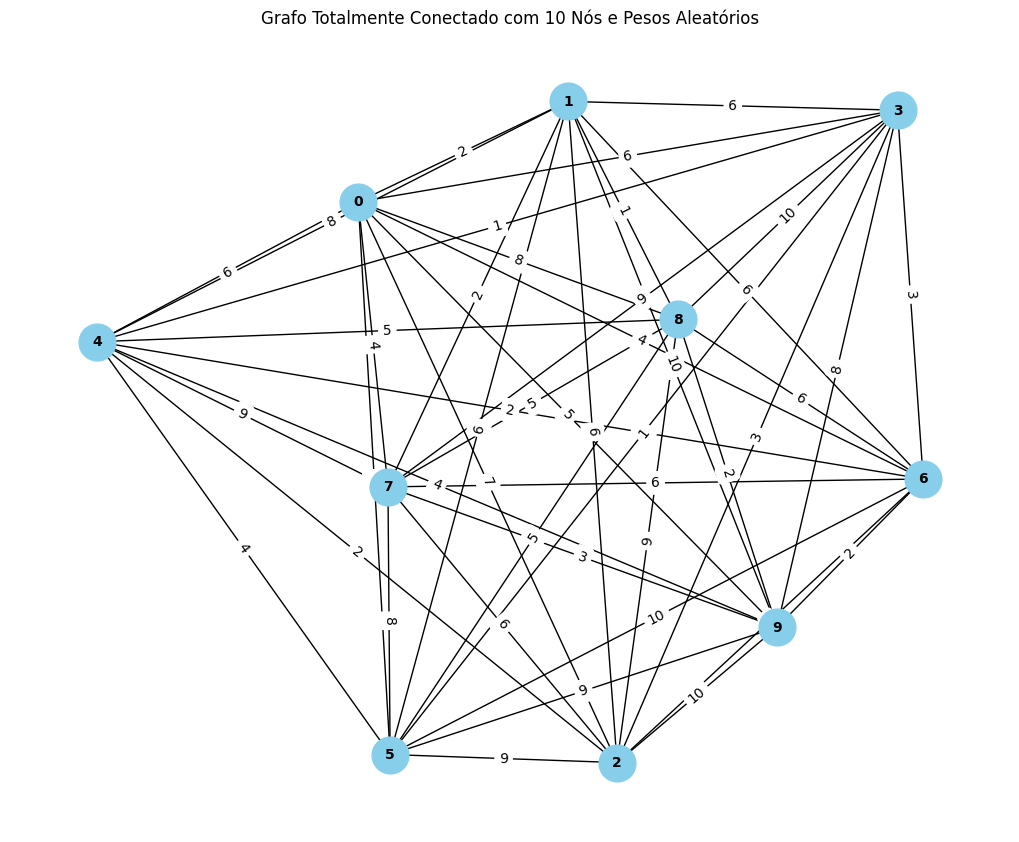

+--------------+-------------+-------------------+
| Algoritmo    |   Tempo (s) |   Memória (bytes) |
+==============+=============+===================+
| Dijkstra     |   0.0179219 |             17126 |
+--------------+-------------+-------------------+
| Bellman-Ford |   3.47031   |             78622 |
+--------------+-------------+-------------------+


In [ ]:
import time
import tracemalloc
import random
from collections import defaultdict
from tabulate import tabulate
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import random

# Classe para o algoritmo de Dijkstra
class GrafoDijkstra:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u].append((v, peso))

    def dijkstra(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0
        pq = [(0, start)]

        while pq:
            d, u = heapq.heappop(pq)
            if d > dist[u]:
                continue
            for v, peso in self.grafo[u]:
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(pq, (dist[v], v))

        return dist[-1]  # Retorna a distância até o último nó

# Classe para o algoritmo de Bellman-Ford
class GrafoBellmanFord:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        self.arestas.append((u, v, peso))

    def bellman_ford(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0

        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        return dist[-1]  # Retorna a distância até o último nó

# Função para medir o tempo e a memória
def medir_algoritmo(funcao, *args):
    tracemalloc.start()
    start_time = time.time()
    resultado = funcao(*args)
    end_time = time.time()
    memory_used, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, memory_used

# Configuração do grafo com 1000 nós totalmente conectados
#num_vertices = 200
#grafo_dijkstra = GrafoDijkstra(num_vertices)
#grafo_bellman = GrafoBellmanFord(num_vertices)

# Configuração do grafo com 10 nós totalmente conectados para visualização
num_vertices = 10  # Para 1000 nós, a visualização ficaria confusa
G = nx.Graph()

# Adiciona nós ao grafo
for i in range(num_vertices):
    G.add_node(i)

# Adiciona arestas com pesos aleatórios entre cada par de nós
for u in range(num_vertices):
    for v in range(u + 1, num_vertices):
        peso = random.randint(1, 10)
        G.add_edge(u, v, weight=peso)

# Desenha o grafo com pesos das arestas
pos = nx.spring_layout(G)  # Layout para posicionamento dos nós
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=700, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

plt.title("Grafo Totalmente Conectado com 10 Nós e Pesos Aleatórios")
plt.show()

# Adiciona arestas com peso aleatório entre cada par de nós
for u in range(num_vertices):
    for v in range(u + 1, num_vertices):
        peso = random.randint(1, 10)
        grafo_dijkstra.adicionar_aresta(u, v, peso)
        grafo_dijkstra.adicionar_aresta(v, u, peso)
        grafo_bellman.adicionar_aresta(u, v, peso)
        grafo_bellman.adicionar_aresta(v, u, peso)

# Tabela de resultados com tempo e memória para Dijkstra e Bellman-Ford
resultados = [
    ["Dijkstra", *medir_algoritmo(grafo_dijkstra.dijkstra, 0)],
    ["Bellman-Ford", *medir_algoritmo(grafo_bellman.bellman_ford, 0)]
]

# Exibir resultados em tabela
print(tabulate(resultados, headers=["Algoritmo", "Tempo (s)", "Memória (bytes)"], tablefmt="grid"))

+--------------+-------------+-------------------+
| Algoritmo    |   Tempo (s) |   Memória (bytes) |
+==============+=============+===================+
| Dijkstra     | 6.48499e-05 |               624 |
+--------------+-------------+-------------------+
| Bellman-Ford | 0.000145912 |               552 |
+--------------+-------------+-------------------+


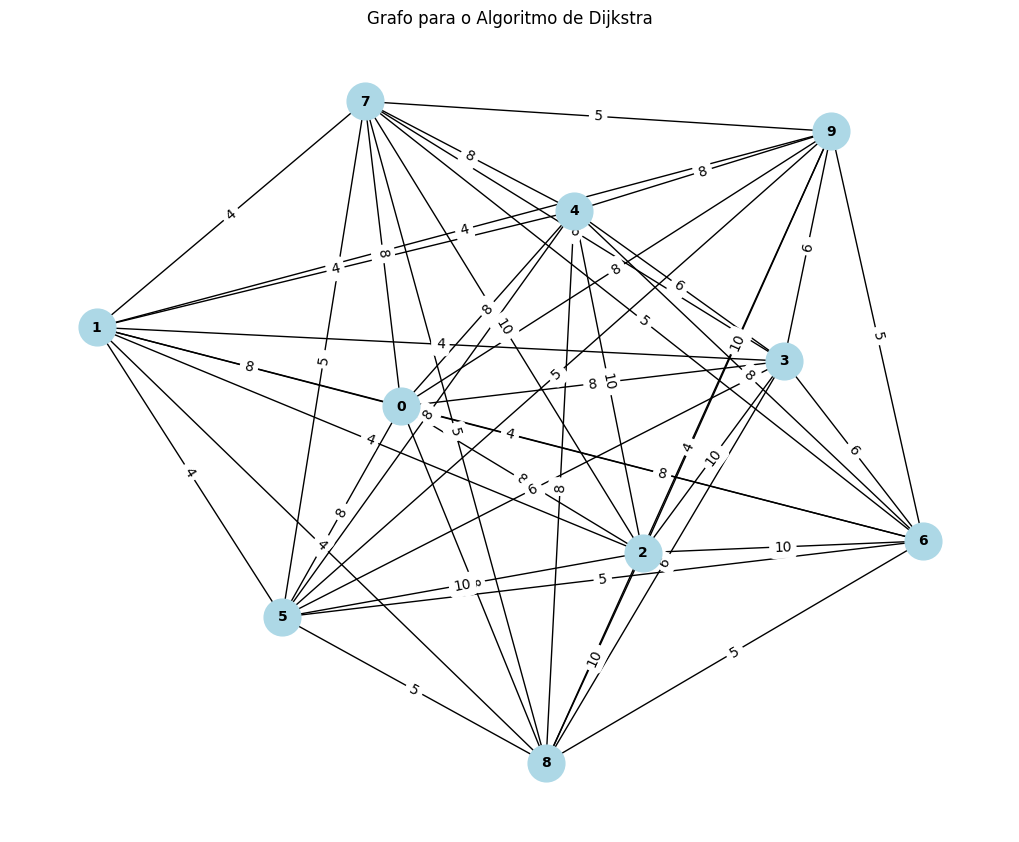

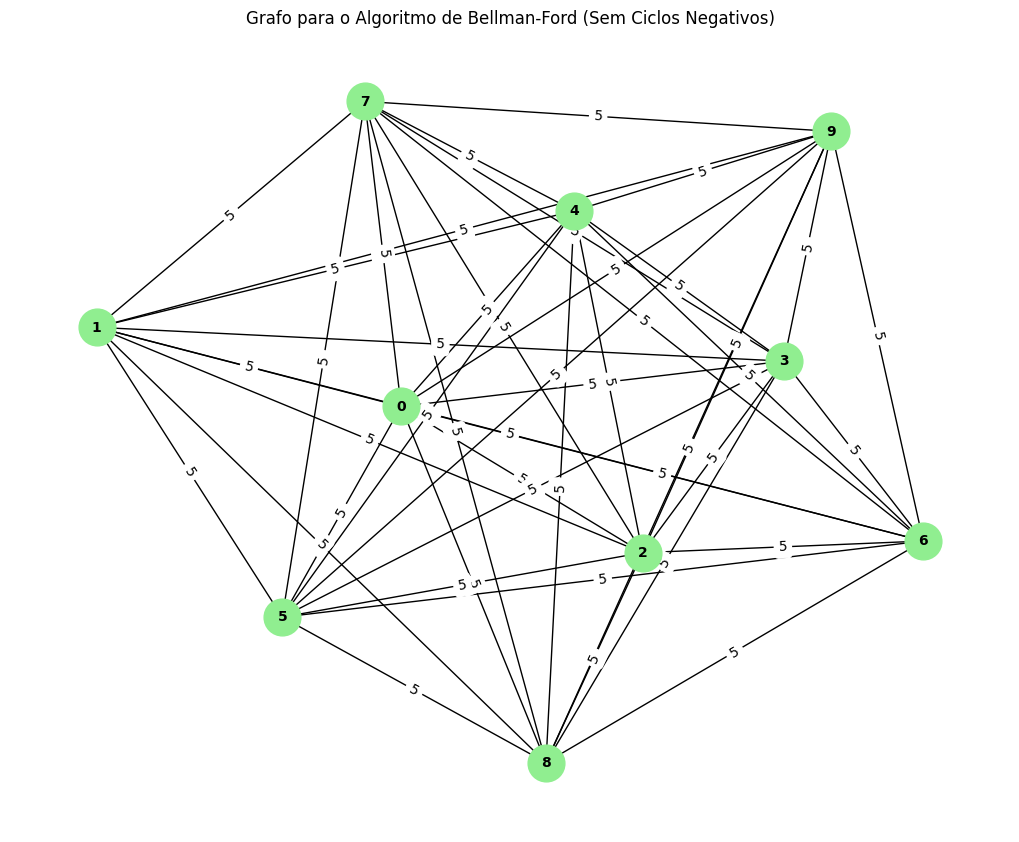

In [ ]:
import time
import tracemalloc
import random
from collections import defaultdict
from tabulate import tabulate
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Classe para o algoritmo de Dijkstra
class GrafoDijkstra:
    def __init__(self, vertices):
        self.V = vertices
        self.grafo = defaultdict(list)

    def adicionar_aresta(self, u, v, peso):
        self.grafo[u].append((v, peso))

    def dijkstra(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0
        pq = [(0, start)]

        while pq:
            d, u = heapq.heappop(pq)
            if d > dist[u]:
                continue
            for v, peso in self.grafo[u]:
                if dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso
                    heapq.heappush(pq, (dist[v], v))

        return dist  # Retorna a lista de distâncias para todos os nós

# Classe para o algoritmo de Bellman-Ford
class GrafoBellmanFord:
    def __init__(self, vertices):
        self.V = vertices
        self.arestas = []

    def adicionar_aresta(self, u, v, peso):
        if peso >= 0:  # Evita ciclos negativos ao garantir pesos não-negativos
            self.arestas.append((u, v, peso))

    def bellman_ford(self, start):
        dist = [float('inf')] * self.V
        dist[start] = 0

        for _ in range(self.V - 1):
            for u, v, peso in self.arestas:
                if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                    dist[v] = dist[u] + peso

        # Verificação de ciclo negativo
        for u, v, peso in self.arestas:
            if dist[u] != float('inf') and dist[u] + peso < dist[v]:
                raise ValueError("Ciclo negativo detectado no grafo.")

        return dist  # Retorna a lista de distâncias para todos os nós

# Função para medir o tempo e a memória
def medir_algoritmo(funcao, *args):
    tracemalloc.start()
    start_time = time.time()
    try:
        resultado = funcao(*args)
    except ValueError as e:
        resultado = str(e)
    end_time = time.time()
    memory_used, _ = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, memory_used, resultado

# Configuração para um grafo com 10 nós totalmente conectados
num_vertices = 10
grafo_dijkstra = GrafoDijkstra(num_vertices)
grafo_bellman = GrafoBellmanFord(num_vertices)

# Adiciona arestas com peso aleatório entre cada par de nós
for u in range(num_vertices):
    for v in range(u + 1, num_vertices):
        peso_dijkstra = random.randint(1, 10)
        peso_bellman = random.randint(1, 10)  # Peso não-negativo para evitar ciclos negativos
        grafo_dijkstra.adicionar_aresta(u, v, peso_dijkstra)
        grafo_bellman.adicionar_aresta(u, v, peso_bellman)

# Tabela de resultados com tempo e memória para Dijkstra e Bellman-Ford
resultados = [
    ["Dijkstra", *medir_algoritmo(grafo_dijkstra.dijkstra, 0)[:2]],
    ["Bellman-Ford", *medir_algoritmo(grafo_bellman.bellman_ford, 0)[:2]]
]

# Exibir resultados em tabela
print(tabulate(resultados, headers=["Algoritmo", "Tempo (s)", "Memória (bytes)"], tablefmt="grid"))

# Desenho dos grafos
pos = nx.spring_layout(nx.Graph())
G_dijkstra = nx.Graph()
G_bellman_ford = nx.Graph()

for u in range(num_vertices):
    G_dijkstra.add_node(u)
    G_bellman_ford.add_node(u)
    for v in range(u + 1, num_vertices):
        G_dijkstra.add_edge(u, v, weight=grafo_dijkstra.grafo[u][0][1])
        G_bellman_ford.add_edge(u, v, weight=grafo_bellman.arestas[0][2])

# Cria o layout de posicionamento apenas para os nós em G_dijkstra
pos = nx.spring_layout(G_dijkstra)

# Desenha o grafo de Dijkstra
plt.figure(figsize=(10, 8))
nx.draw(G_dijkstra, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G_dijkstra, pos, edge_labels={(u, v): d['weight'] for u, v, d in G_dijkstra.edges(data=True)})
plt.title("Grafo para o Algoritmo de Dijkstra")
plt.show()

# Desenha o grafo de Bellman-Ford
plt.figure(figsize=(10, 8))
nx.draw(G_bellman_ford, pos, with_labels=True, node_color="lightgreen", node_size=700, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G_bellman_ford, pos, edge_labels={(u, v): d['weight'] for u, v, d in G_bellman_ford.edges(data=True)})
plt.title("Grafo para o Algoritmo de Bellman-Ford (Sem Ciclos Negativos)")
plt.show()


Dijkstra - Distância mínima de cada nó: {0: 0, 1: -1, 2: 1, 3: 0, 4: 3}
Dijkstra - Caminho de menor custo: [0, 2, 1, 3, 4]
Bellman-Ford - Distância mínima de cada nó: {0: 0, 1: -1, 2: 1, 3: 0, 4: 3}
Bellman-Ford - Caminho de menor custo: [0, 2, 1, 3, 4]


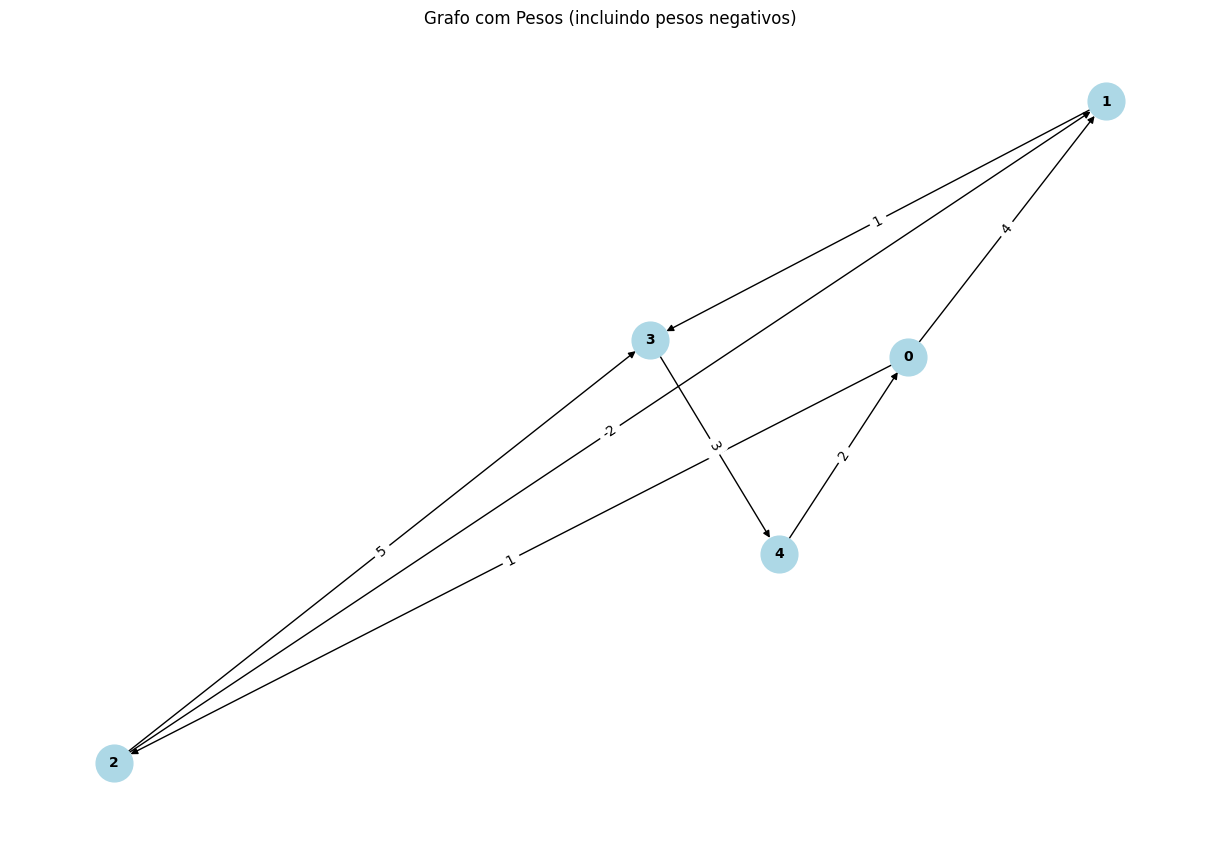

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def dijkstra_algorithm(graph, start_node):
    # Calcula o caminho mínimo usando Dijkstra
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Seleciona o nó com a menor distância
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        # Atualiza as distâncias para os vizinhos
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    # Inicializa as distâncias e predecessores para Bellman-Ford
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    # Reconstrói o caminho de menor custo usando os predecessores
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Cria um grafo com pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 4),
    (0, 2, 1),
    (1, 3, 1),
    (2, 1, -2),  # Aresta com peso negativo
    (2, 3, 5),
    (3, 4, 3),
    (4, 0, 2)  # Aresta de retorno
]
G.add_weighted_edges_from(edges)

# Defina o nó inicial e final
start_node = 0
target_node = 4

# Executa o algoritmo de Dijkstra
try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    print("Dijkstra - Distância mínima de cada nó:", distances_dijkstra)
    print("Dijkstra - Caminho de menor custo:", dijkstra_path)
except Exception as e:
    print("Erro no algoritmo de Dijkstra:", e)

# Executa o algoritmo de Bellman-Ford
try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    print("Bellman-Ford - Distância mínima de cada nó:", distances_bellman_ford)
    print("Bellman-Ford - Caminho de menor custo:", bellman_ford_path)
except ValueError as e:
    print("Erro no algoritmo de Bellman-Ford:", e)

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


Dijkstra - Distância mínima de cada nó: {0: 0, 1: -1, 2: 1, 3: 0, 4: 3, 5: 2, 6: 2, 7: 3, 8: 0, 9: 2}
Dijkstra - Caminho de menor custo: [0, 2, 1, 3, 5, 7, 8, 9]
Bellman-Ford - Distância mínima de cada nó: {0: 0, 1: -1, 2: 1, 3: 0, 4: 3, 5: 2, 6: 2, 7: 3, 8: 0, 9: 2}
Bellman-Ford - Caminho de menor custo: [0, 2, 1, 3, 5, 7, 8, 9]


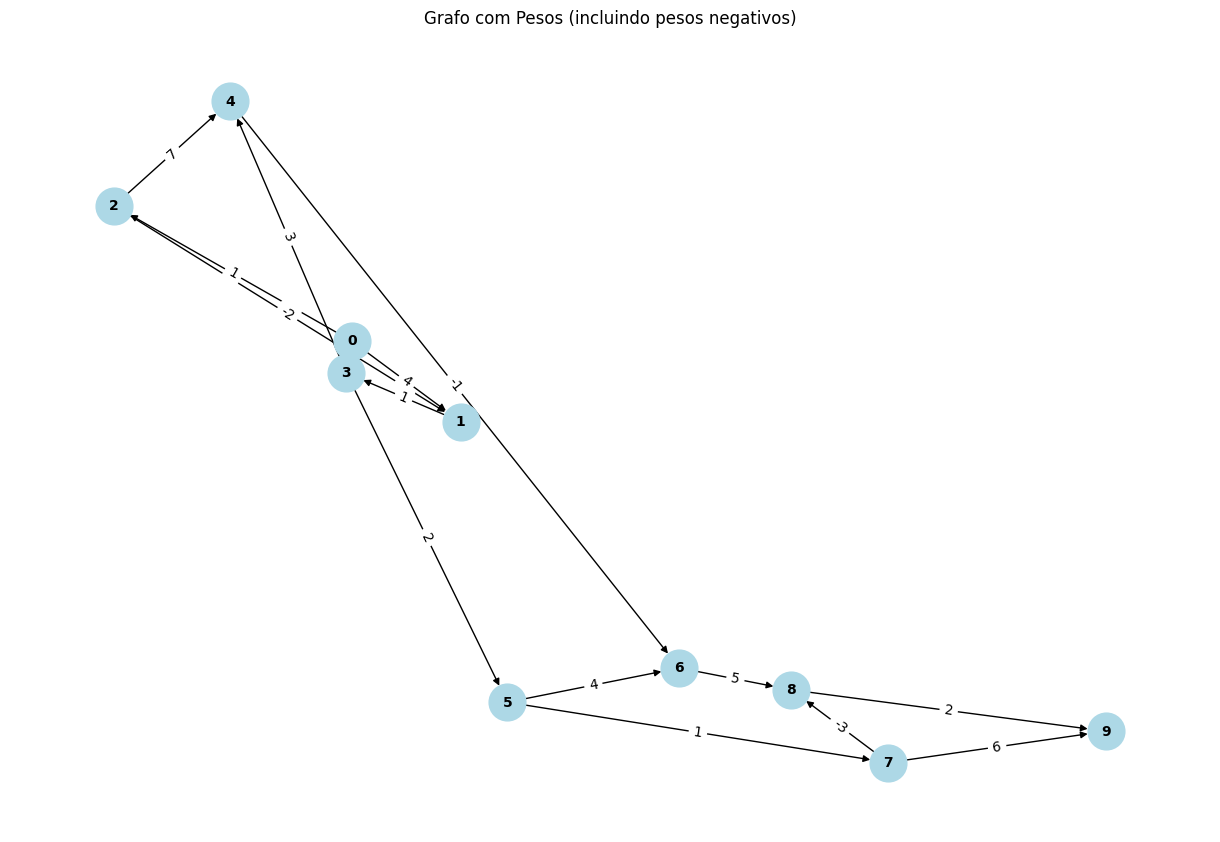

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_algorithm(graph, start_node):
    # Calcula o caminho mínimo usando Dijkstra
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Seleciona o nó com a menor distância
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        # Atualiza as distâncias para os vizinhos
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    # Inicializa as distâncias e predecessores para Bellman-Ford
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    # Reconstrói o caminho de menor custo usando os predecessores
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Cria um grafo com 10 nós, incluindo pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 4),
    (0, 2, 1),
    (1, 3, 1),
    (2, 1, -2),  # Aresta com peso negativo
    (2, 4, 7),
    (3, 4, 3),
    (3, 5, 2),
    (4, 6, -1),  # Aresta com peso negativo
    (5, 6, 4),
    (5, 7, 1),
    (6, 8, 5),
    (7, 8, -3),  # Aresta com peso negativo
    (8, 9, 2),
    (7, 9, 6)
]
G.add_weighted_edges_from(edges)

# Defina o nó inicial e final
start_node = 0
target_node = 9

# Executa o algoritmo de Dijkstra
try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    print("Dijkstra - Distância mínima de cada nó:", distances_dijkstra)
    print("Dijkstra - Caminho de menor custo:", dijkstra_path)
except Exception as e:
    print("Erro no algoritmo de Dijkstra:", e)

# Executa o algoritmo de Bellman-Ford
try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    print("Bellman-Ford - Distância mínima de cada nó:", distances_bellman_ford)
    print("Bellman-Ford - Caminho de menor custo:", bellman_ford_path)
except ValueError as e:
    print("Erro no algoritmo de Bellman-Ford:", e)

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


Dijkstra - Distância mínima de cada nó: {0: 0, 1: 2, 2: 5, 3: 9, 4: -1, 5: 6, 6: 12, 7: -3, 8: 3, 9: 5, 10: 14, 11: 3, 12: -1, 13: 8, 14: 6, 15: 8, 16: -3, 17: 15, 18: 12, 19: -1}
Dijkstra - Caminho de menor custo: [0, 1, 4, 8, 12, 16, 19]
Bellman-Ford - Distância mínima de cada nó: {0: 0, 1: 2, 2: 5, 3: 9, 4: -1, 5: 6, 6: 12, 7: -3, 8: 3, 9: 5, 10: 14, 11: 3, 12: -1, 13: 8, 14: 6, 15: 8, 16: -3, 17: 15, 18: 12, 19: -1}
Bellman-Ford - Caminho de menor custo: [0, 1, 4, 8, 12, 16, 19]


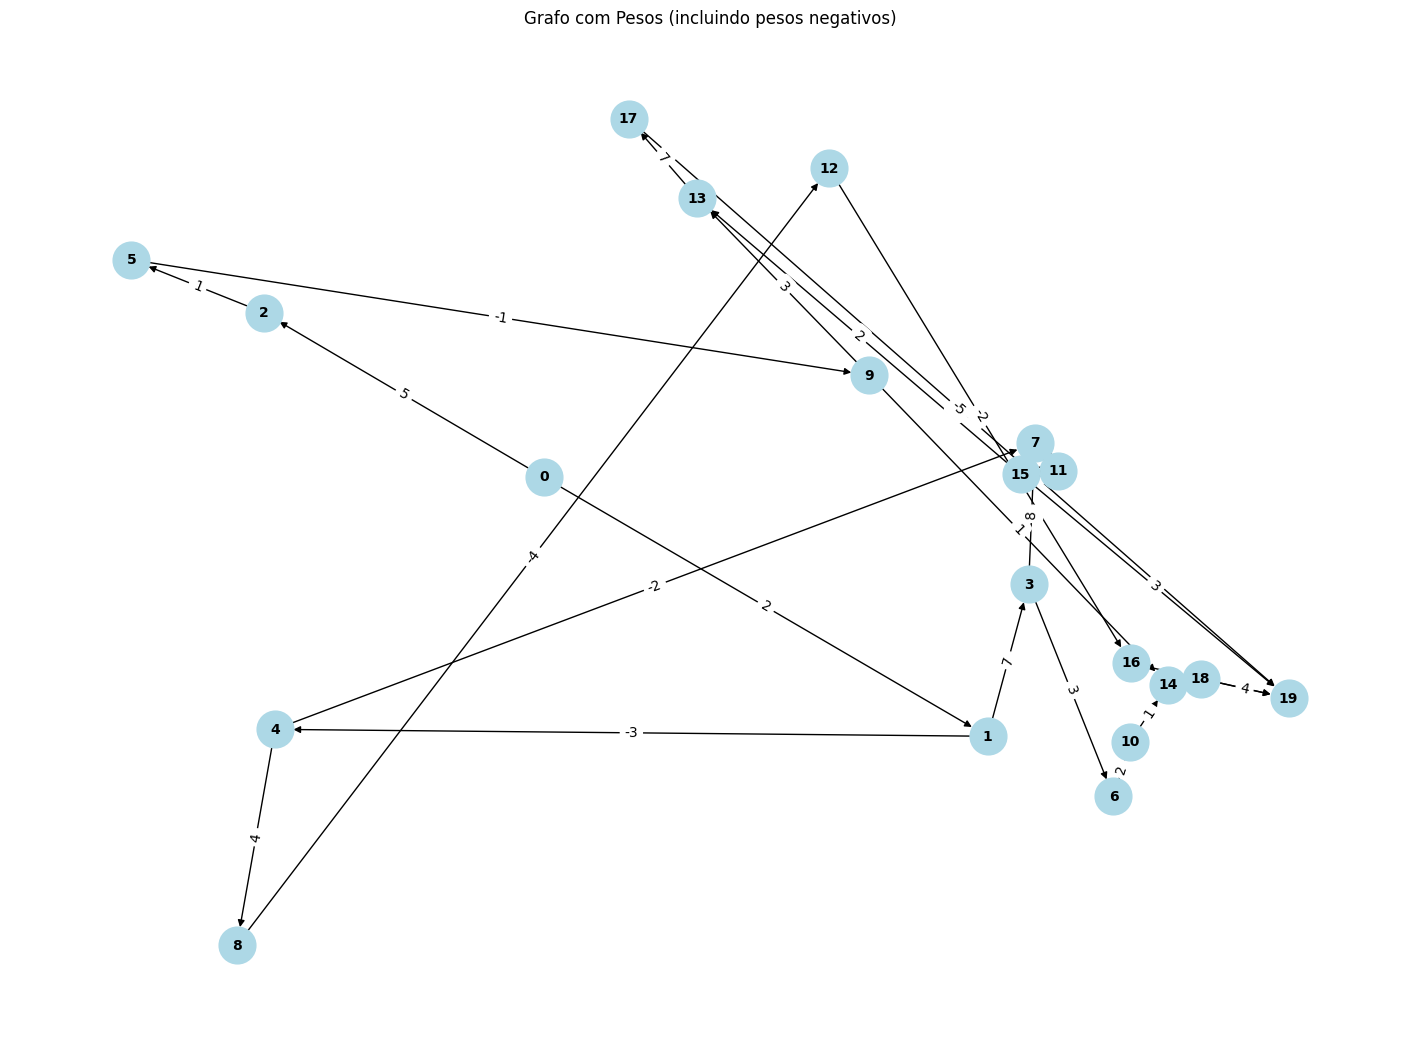

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_algorithm(graph, start_node):
    # Calcula o caminho mínimo usando Dijkstra
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Seleciona o nó com a menor distância
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        # Atualiza as distâncias para os vizinhos
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    # Inicializa as distâncias e predecessores para Bellman-Ford
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    # Reconstrói o caminho de menor custo usando os predecessores
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Cria um grafo com 20 nós, incluindo pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Define o nó inicial e final
start_node = 0
target_node = 19

# Executa o algoritmo de Dijkstra
try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    print("Dijkstra - Distância mínima de cada nó:", distances_dijkstra)
    print("Dijkstra - Caminho de menor custo:", dijkstra_path)
except Exception as e:
    print("Erro no algoritmo de Dijkstra:", e)

# Executa o algoritmo de Bellman-Ford
try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    print("Bellman-Ford - Distância mínima de cada nó:", distances_bellman_ford)
    print("Bellman-Ford - Caminho de menor custo:", bellman_ford_path)
except ValueError as e:
    print("Erro no algoritmo de Bellman-Ford:", e)

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


Dijkstra - Distância mínima de cada nó: {0: 0, 1: 2, 2: 5, 3: 9, 4: -1, 5: 6, 6: 12, 7: -3, 8: 3, 9: 5, 10: 14, 11: 3, 12: -1, 13: 8, 14: 6, 15: 8, 16: -3, 17: 15, 18: 12, 19: -1}
Dijkstra - Caminho de menor custo: [0, 1, 4, 8, 12, 16, 19]
Dijkstra - Tempo de execução: 0.0034 segundos
Dijkstra - Memória usada: 0.0000 MB
Bellman-Ford - Distância mínima de cada nó: {0: 0, 1: 2, 2: 5, 3: 9, 4: -1, 5: 6, 6: 12, 7: -3, 8: 3, 9: 5, 10: 14, 11: 3, 12: -1, 13: 8, 14: 6, 15: 8, 16: -3, 17: 15, 18: 12, 19: -1}
Bellman-Ford - Caminho de menor custo: [0, 1, 4, 8, 12, 16, 19]
Bellman-Ford - Tempo de execução: 0.0045 segundos
Bellman-Ford - Memória usada: 0.0000 MB


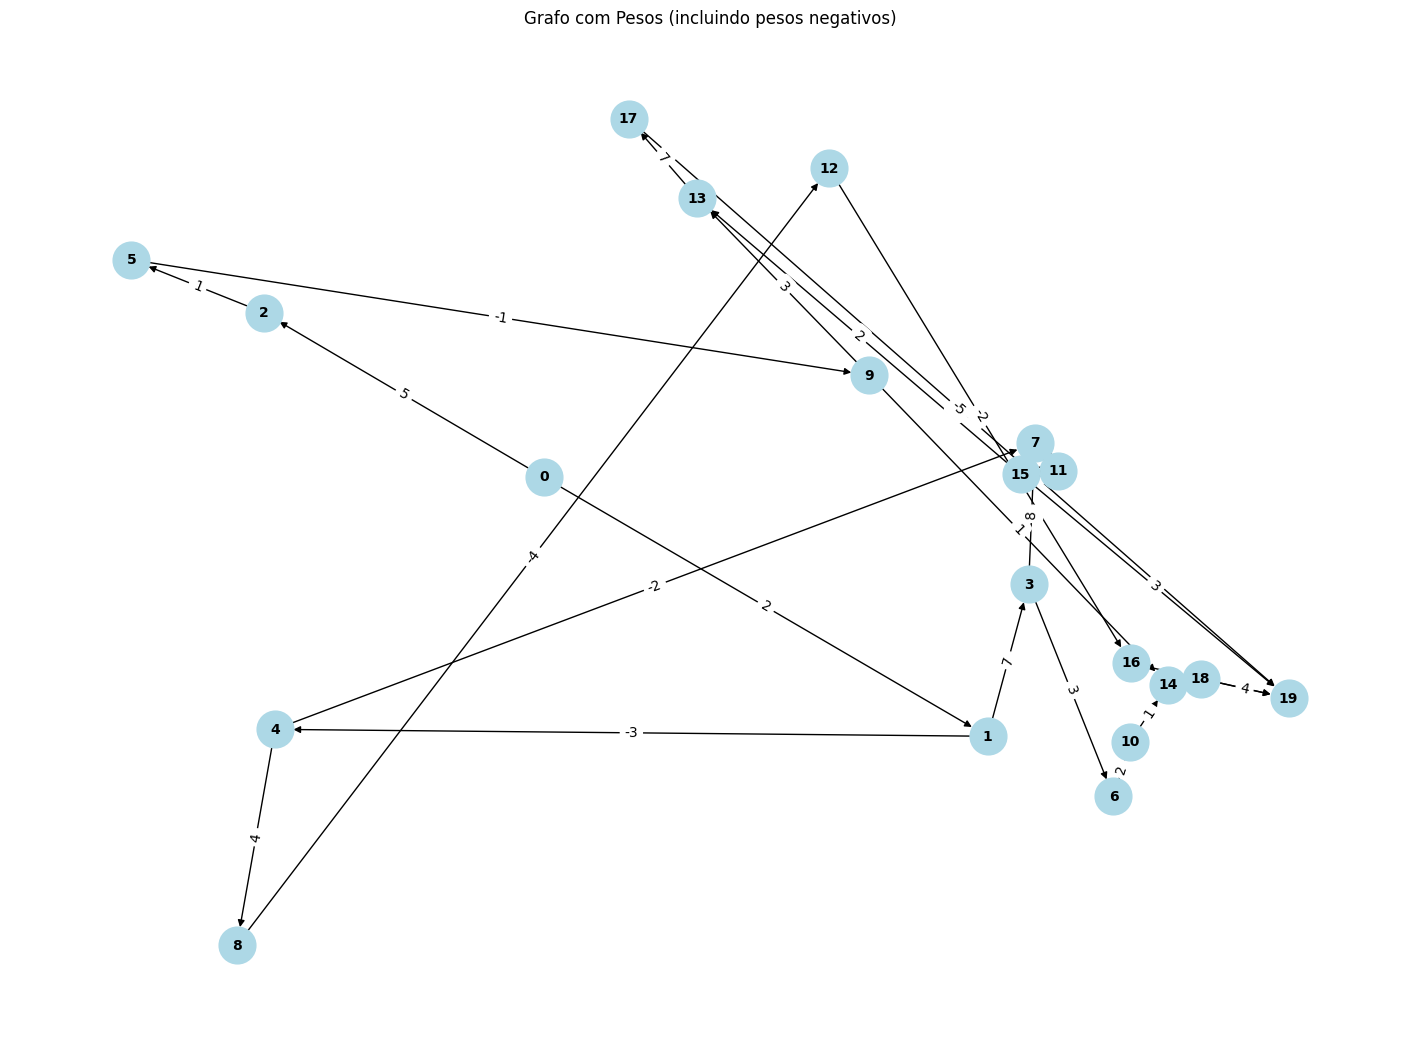

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os

def dijkstra_algorithm(graph, start_node):
    # Calcula o caminho mínimo usando Dijkstra
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Seleciona o nó com a menor distância
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        # Atualiza as distâncias para os vizinhos
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    # Inicializa as distâncias e predecessores para Bellman-Ford
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    # Reconstrói o caminho de menor custo usando os predecessores
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Cria um grafo com 20 nós, incluindo pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Define o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage()

try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    print("Dijkstra - Distância mínima de cada nó:", distances_dijkstra)
    print("Dijkstra - Caminho de menor custo:", dijkstra_path)
except Exception as e:
    print("Erro no algoritmo de Dijkstra:", e)

end_time = time.time()
end_memory = memory_usage()
print(f"Dijkstra - Tempo de execução: {end_time - start_time:.4f} segundos")
print(f"Dijkstra - Memória usada: {end_memory - start_memory:.4f} MB")

# Medindo o tempo e memória para o algoritmo de Bellman-Ford
start_time = time.time()
start_memory = memory_usage()

try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    print("Bellman-Ford - Distância mínima de cada nó:", distances_bellman_ford)
    print("Bellman-Ford - Caminho de menor custo:", bellman_ford_path)
except ValueError as e:
    print("Erro no algoritmo de Bellman-Ford:", e)

end_time = time.time()
end_memory = memory_usage()
print(f"Bellman-Ford - Tempo de execução: {end_time - start_time:.4f} segundos")
print(f"Bellman-Ford - Memória usada: {end_memory - start_memory:.4f} MB")

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


+--------------+--------------------+----------------+--------------------------+
| Algoritmo    |   Tempo (segundos) |   Memória (MB) | Caminho                  |
+==============+====================+================+==========================+
| Dijkstra     |          0.0017283 |              0 | [0, 1, 4, 8, 12, 16, 19] |
+--------------+--------------------+----------------+--------------------------+
| Bellman-Ford |          0.0131481 |              0 | [0, 1, 4, 8, 12, 16, 19] |
+--------------+--------------------+----------------+--------------------------+


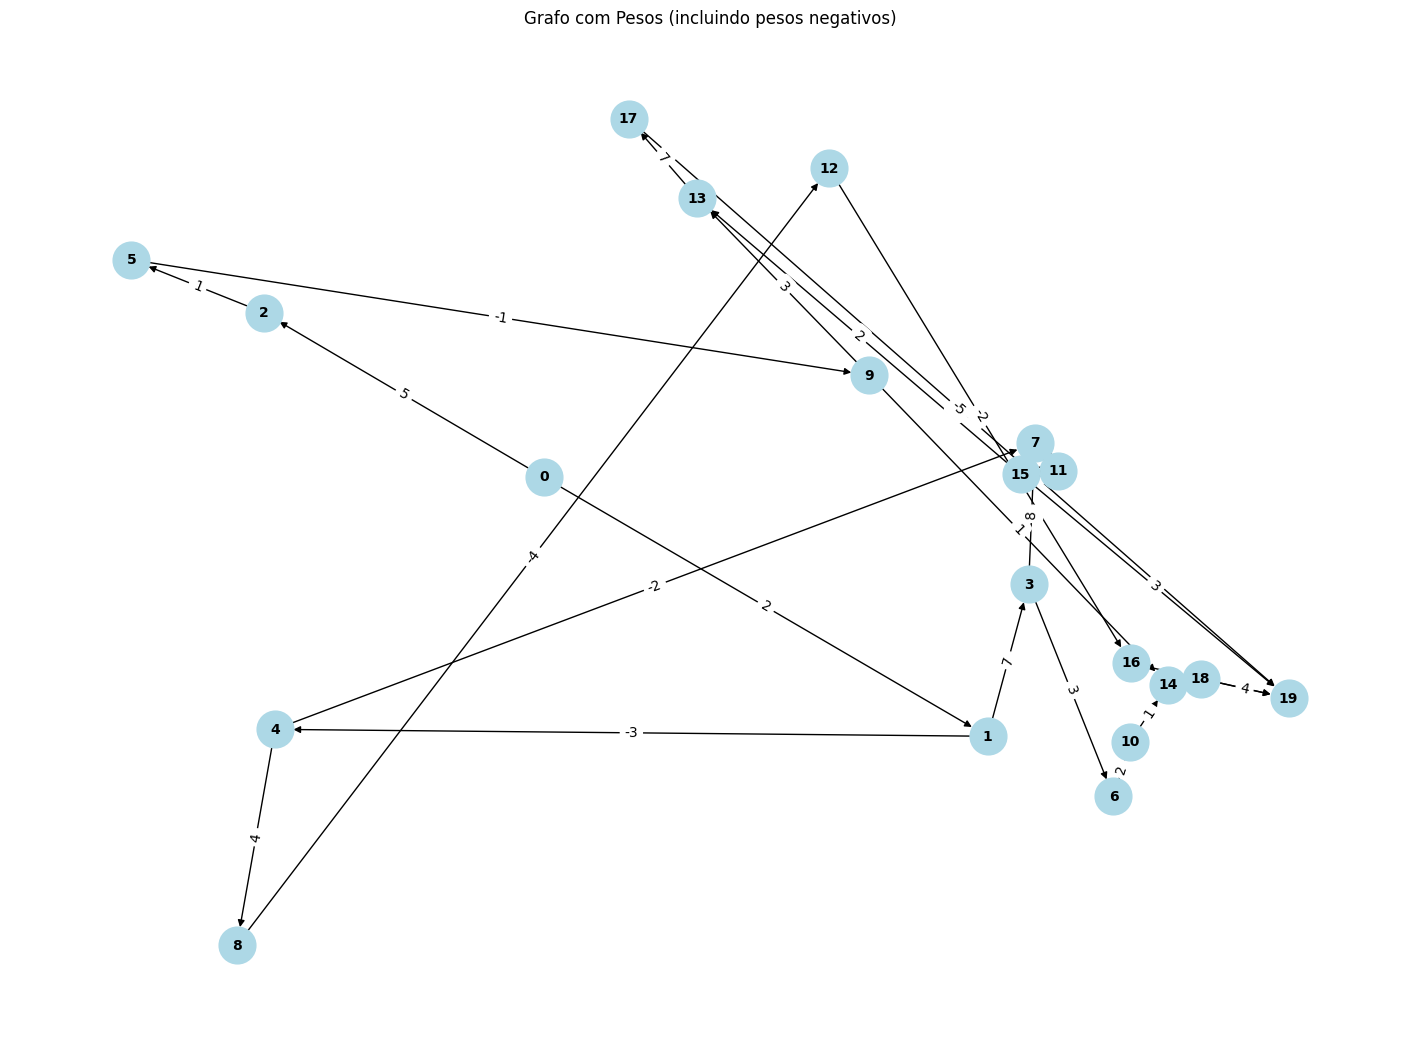

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os
from tabulate import tabulate

def dijkstra_algorithm(graph, start_node):
    # Calcula o caminho mínimo usando Dijkstra
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Seleciona o nó com a menor distância
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        # Atualiza as distâncias para os vizinhos
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    # Inicializa as distâncias e predecessores para Bellman-Ford
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    # Reconstrói o caminho de menor custo usando os predecessores
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Cria um grafo com 20 nós, incluindo pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Define o nó inicial e final
start_node = 0
target_node = 19

# Armazenar os resultados de tempo e memória para cada algoritmo
results = []

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage()

try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    dijkstra_time = time.time() - start_time
    dijkstra_memory = memory_usage() - start_memory
    results.append(['Dijkstra', dijkstra_time, dijkstra_memory, dijkstra_path])
except Exception as e:
    results.append(['Dijkstra', 'Erro', 'Erro', str(e)])

# Medindo o tempo e memória para o algoritmo de Bellman-Ford
start_time = time.time()
start_memory = memory_usage()

try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory
    results.append(['Bellman-Ford', bellman_ford_time, bellman_ford_memory, bellman_ford_path])
except ValueError as e:
    results.append(['Bellman-Ford', 'Erro', 'Erro', str(e)])

# Exibir resultados em tabela
headers = ['Algoritmo', 'Tempo (segundos)', 'Memória (MB)', 'Caminho']
print(tabulate(results, headers=headers, tablefmt="grid"))

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


+--------------+--------------------+----------------+--------------------------+
| Algoritmo    |   Tempo (segundos) |   Memória (MB) | Caminho                  |
+==============+====================+================+==========================+
| Dijkstra     |         0.00138998 |              0 | [0, 1, 4, 8, 12, 16, 19] |
+--------------+--------------------+----------------+--------------------------+
| Bellman-Ford |         0.00179338 |              0 | [0, 1, 4, 8, 12, 16, 19] |
+--------------+--------------------+----------------+--------------------------+

Distâncias Mínimas de Cada Nó (Dijkstra):
+------+-------------+
|   Nó |   Distância |
+======+=============+
|    0 |           0 |
+------+-------------+
|    1 |           2 |
+------+-------------+
|    2 |           5 |
+------+-------------+
|    3 |           9 |
+------+-------------+
|    4 |          -1 |
+------+-------------+
|    5 |           6 |
+------+-------------+
|    6 |          12 |
+------+-------

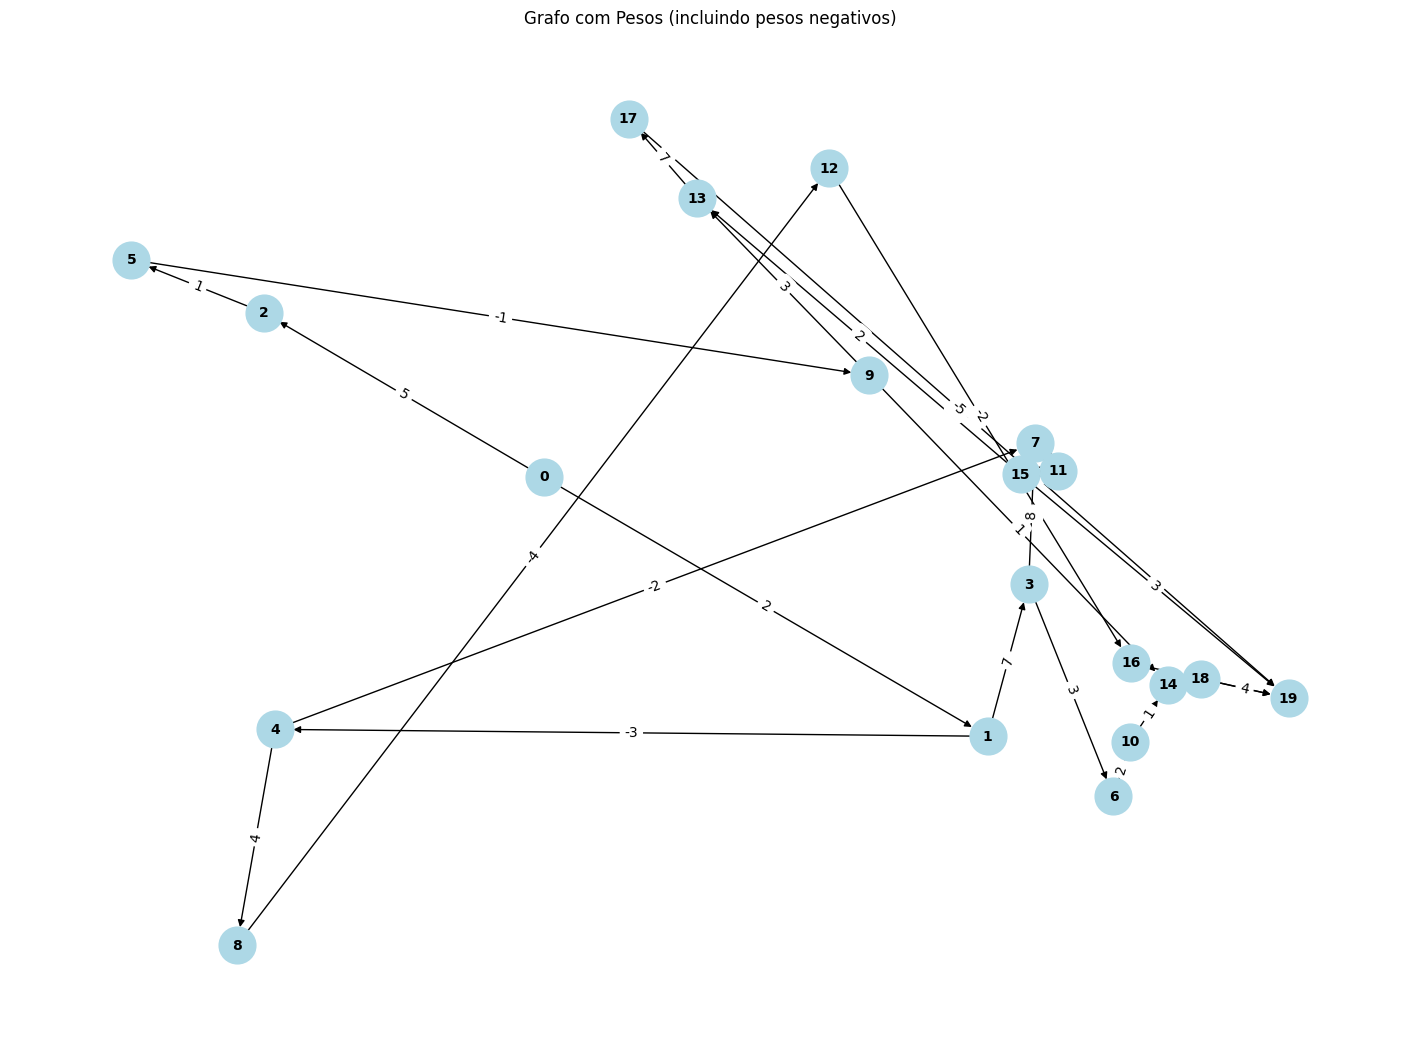

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os
from tabulate import tabulate

def dijkstra_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Cria um grafo com 20 nós, incluindo pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Define o nó inicial e final
start_node = 0
target_node = 19

# Armazenar os resultados de tempo, memória e distâncias para cada algoritmo
results = []

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage()

try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    dijkstra_time = time.time() - start_time
    dijkstra_memory = memory_usage() - start_memory
    results.append(['Dijkstra', dijkstra_time, dijkstra_memory, dijkstra_path])
except Exception as e:
    results.append(['Dijkstra', 'Erro', 'Erro', str(e)])

# Medindo o tempo e memória para o algoritmo de Bellman-Ford
start_time = time.time()
start_memory = memory_usage()

try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory
    results.append(['Bellman-Ford', bellman_ford_time, bellman_ford_memory, bellman_ford_path])
except ValueError as e:
    results.append(['Bellman-Ford', 'Erro', 'Erro', str(e)])

# Exibir resultados de distâncias mínimas e memória
distances_table = []
for node, dist in distances_dijkstra.items():
    distances_table.append([node, dist])

# Exibir resultados em tabela
headers = ['Algoritmo', 'Tempo (segundos)', 'Memória (MB)', 'Caminho']
print(tabulate(results, headers=headers, tablefmt="grid"))

# Exibir distâncias mínimas de cada nó
print("\nDistâncias Mínimas de Cada Nó (Dijkstra):")
print(tabulate(distances_table, headers=["Nó", "Distância"], tablefmt="grid"))

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


+--------------+--------------------+----------------+--------------------------+
| Algoritmo    |   Tempo (segundos) |   Memória (MB) | Caminho                  |
+==============+====================+================+==========================+
| Dijkstra     |         0.00164151 |              0 | [0, 1, 4, 8, 12, 16, 19] |
+--------------+--------------------+----------------+--------------------------+
| Bellman-Ford |         0.00287485 |              0 | [0, 1, 4, 8, 12, 16, 19] |
+--------------+--------------------+----------------+--------------------------+


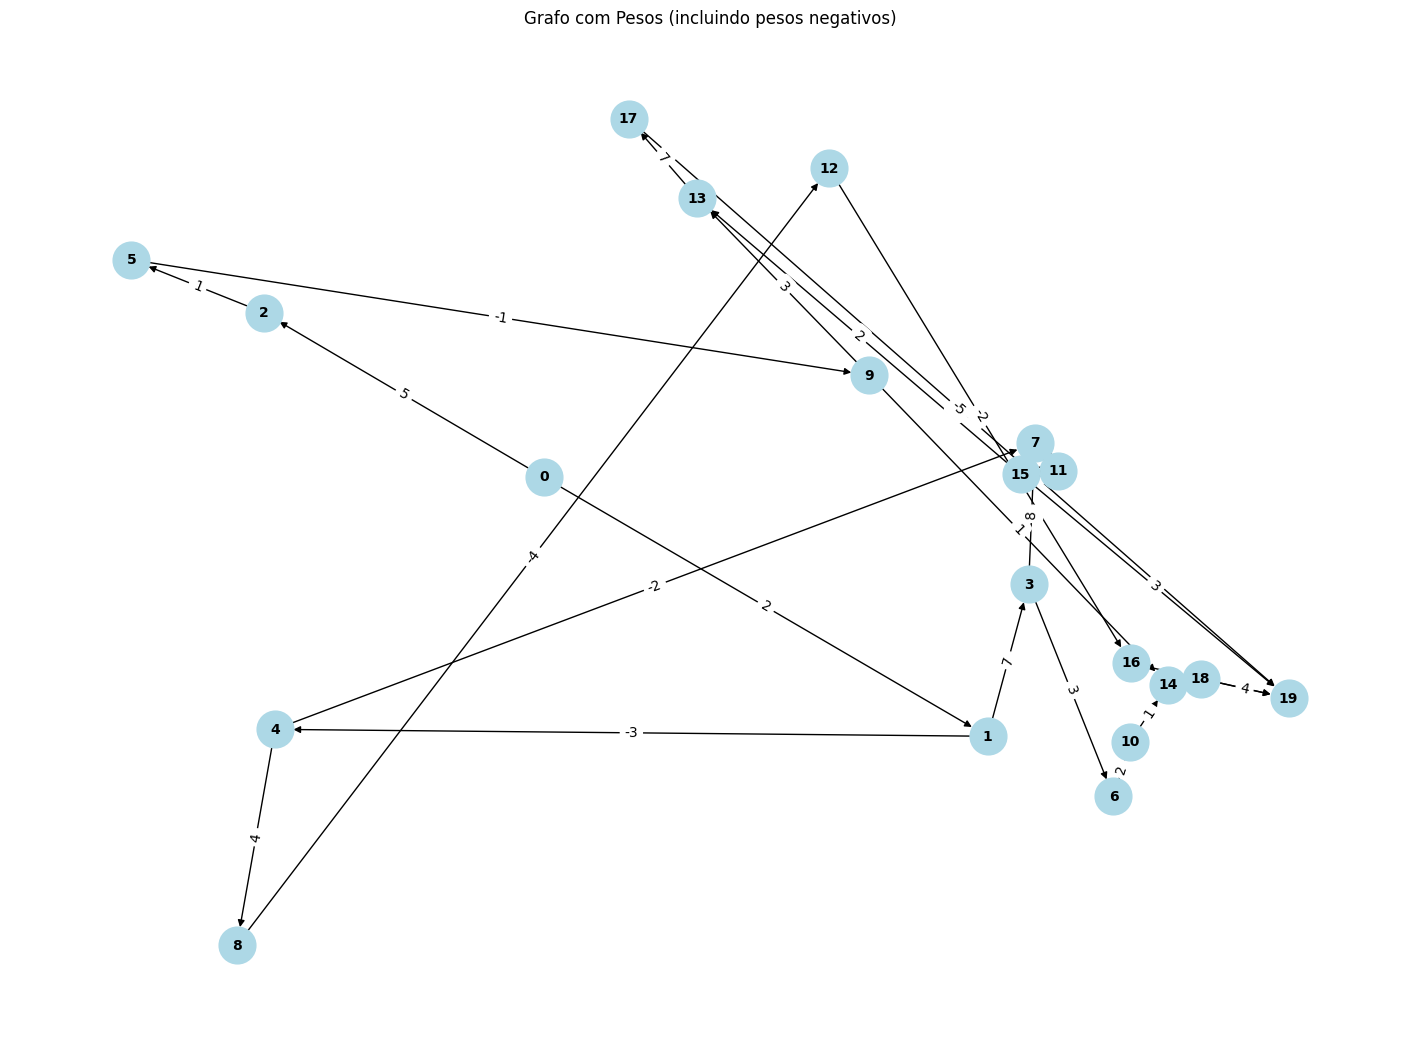

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os
from tabulate import tabulate

def dijkstra_algorithm(graph, start_node):
    # Calcula o caminho mínimo usando Dijkstra
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        # Seleciona o nó com a menor distância
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        # Atualiza as distâncias para os vizinhos
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

def bellman_ford_algorithm(graph, start_node):
    # Inicializa as distâncias e predecessores para Bellman-Ford
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxa as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

def get_shortest_path(predecessors, start_node, target_node):
    # Reconstrói o caminho de menor custo usando os predecessores
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Cria um grafo com 20 nós, incluindo pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Define o nó inicial e final
start_node = 0
target_node = 19

# Armazenar os resultados de tempo e memória para cada algoritmo
results = []

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage()

try:
    distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
    dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)
    dijkstra_time = time.time() - start_time
    dijkstra_memory = memory_usage() - start_memory
    results.append(['Dijkstra', dijkstra_time, dijkstra_memory, dijkstra_path])
except Exception as e:
    results.append(['Dijkstra', 'Erro', 'Erro', str(e)])

# Medindo o tempo e memória para o algoritmo de Bellman-Ford
start_time = time.time()
start_memory = memory_usage()

try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory
    results.append(['Bellman-Ford', bellman_ford_time, bellman_ford_memory, bellman_ford_path])
except ValueError as e:
    results.append(['Bellman-Ford', 'Erro', 'Erro', str(e)])

# Exibir resultados em tabela
headers = ['Algoritmo', 'Tempo (segundos)', 'Memória (MB)', 'Caminho']
print(tabulate(results, headers=headers, tablefmt="grid"))

# Visualização do grafo com pesos das arestas
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo com Pesos (incluindo pesos negativos)")
plt.show()


Algoritmo de Dijkstra:
Tempo de execução: 0.017185 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 4: -1
Nó 5: 6
Nó 6: 12
Nó 7: -3
Nó 8: 3
Nó 9: 5
Nó 10: 14
Nó 11: 3
Nó 12: -1
Nó 13: 8
Nó 14: 6
Nó 15: 8
Nó 16: -3
Nó 17: 15
Nó 18: 12
Nó 19: -1

Caminho de menor custo:
0 -> 1 -> 4 -> 8 -> 12 -> 16 -> 19


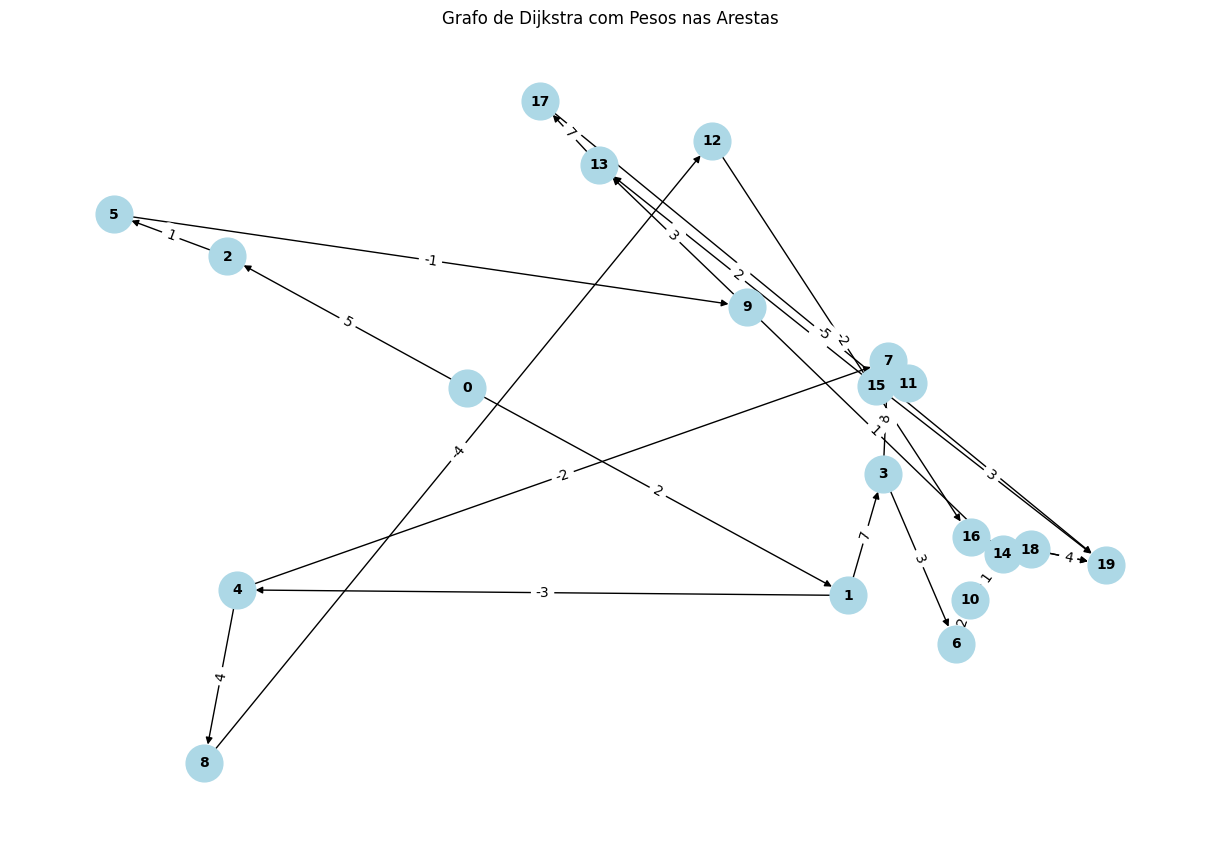

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os

# Função para calcular o caminho mínimo usando Dijkstra
def dijkstra_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Criar o grafo de exemplo
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage()

# Executando o algoritmo de Dijkstra
distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
dijkstra_time = time.time() - start_time
dijkstra_memory = memory_usage() - start_memory

# Obter o caminho de menor custo
dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)

# Exibir os resultados
print(f"Algoritmo de Dijkstra:")
print(f"Tempo de execução: {dijkstra_time:.6f} segundos")
print(f"Memória usada: {dijkstra_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_dijkstra.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if dijkstra_path:
    print(" -> ".join(map(str, dijkstra_path)))
else:
    print("Não existe um caminho válido.")

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo de Dijkstra com Pesos nas Arestas")
plt.show()


Algoritmo de Bellman-Ford:
Tempo de execução: 0.003042 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 4: -1
Nó 5: 6
Nó 6: 12
Nó 7: -3
Nó 8: 3
Nó 9: 5
Nó 10: 14
Nó 11: 3
Nó 12: -1
Nó 13: 8
Nó 14: 6
Nó 15: 8
Nó 16: -3
Nó 17: 15
Nó 18: 12
Nó 19: -1

Caminho de menor custo:
0 -> 1 -> 4 -> 8 -> 12 -> 16 -> 19


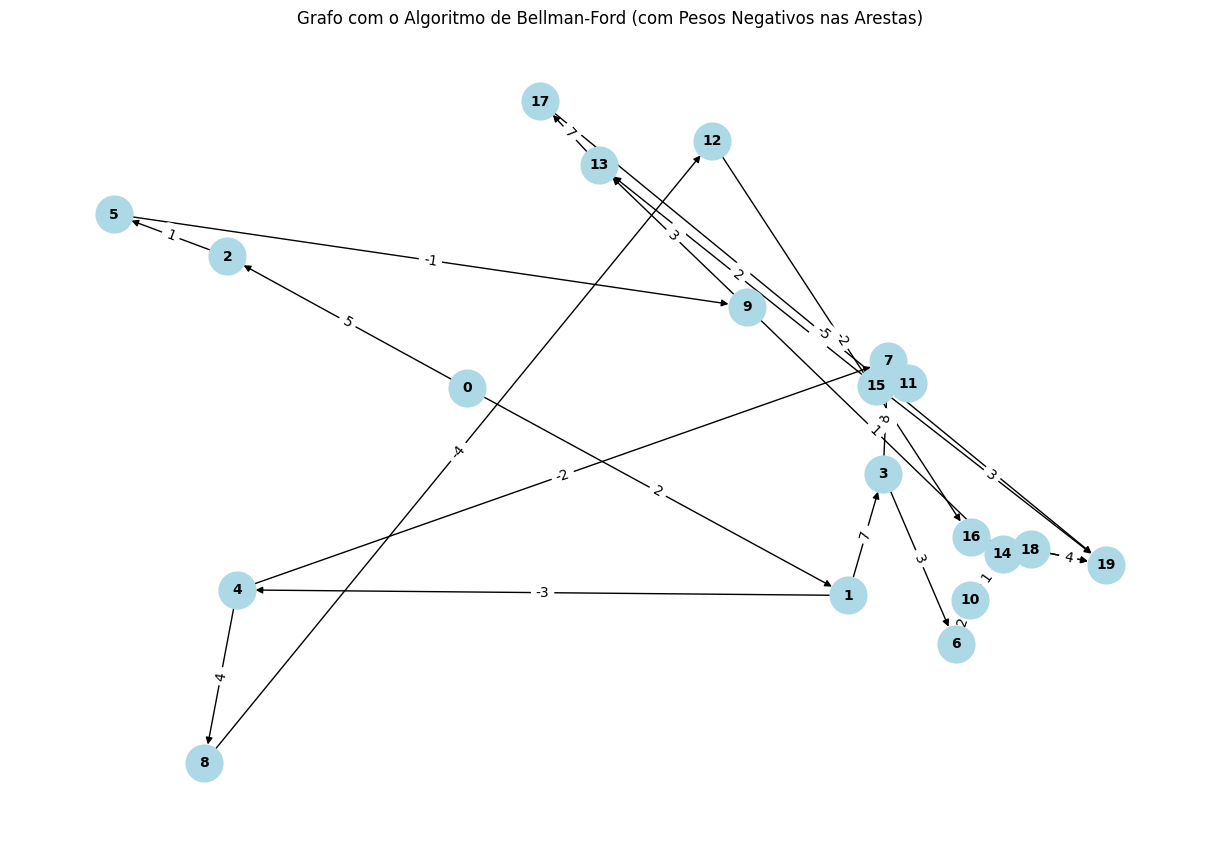

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil
import os

# Função para calcular o caminho mínimo usando o algoritmo de Bellman-Ford
def bellman_ford_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}

    # Relaxar as arestas |V| - 1 vezes
    for _ in range(len(graph.nodes()) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data.get("weight", 1)
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                predecessors[v] = u

    # Verificação de ciclos negativos
    for u, v, data in graph.edges(data=True):
        weight = data.get("weight", 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("O grafo contém um ciclo negativo.")

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Converte para MB

# Criar o grafo de exemplo com arestas com valores negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (1, 4, -3), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, -2), (4, 8, 4), (5, 9, -1),
    (6, 10, 2), (7, 11, 6), (8, 12, -4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, -2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, -5), (18, 19, 4), (9, 14, 1), (15, 13, 2)
]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Bellman-Ford
start_time = time.time()
start_memory = memory_usage()

# Executando o algoritmo de Bellman-Ford
try:
    distances_bellman_ford, predecessors_bellman_ford = bellman_ford_algorithm(G, start_node)
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory

    # Obter o caminho de menor custo
    bellman_ford_path = get_shortest_path(predecessors_bellman_ford, start_node, target_node)

except ValueError as e:
    bellman_ford_time = time.time() - start_time
    bellman_ford_memory = memory_usage() - start_memory
    bellman_ford_path = str(e)

# Exibir os resultados
print(f"Algoritmo de Bellman-Ford:")
print(f"Tempo de execução: {bellman_ford_time:.6f} segundos")
print(f"Memória usada: {bellman_ford_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_bellman_ford.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if isinstance(bellman_ford_path, list):
    print(" -> ".join(map(str, bellman_ford_path)))
else:
    print(bellman_ford_path)

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo com o Algoritmo de Bellman-Ford (com Pesos Negativos nas Arestas)")
plt.show()


In [ ]:
!pip install memory-profiler

Algoritmo de Dijkstra:
Tempo de execução: 0.105971 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 5: 6
Nó 6: 12
Nó 7: 17
Nó 4: inf
Nó 8: inf
Nó 9: 7
Nó 10: 14
Nó 11: 23
Nó 12: inf
Nó 13: 10
Nó 14: 15
Nó 15: 28
Nó 16: inf
Nó 17: 17
Nó 18: 21
Nó 19: 22

Caminho de menor custo:
0 -> 2 -> 5 -> 9 -> 13 -> 17 -> 19


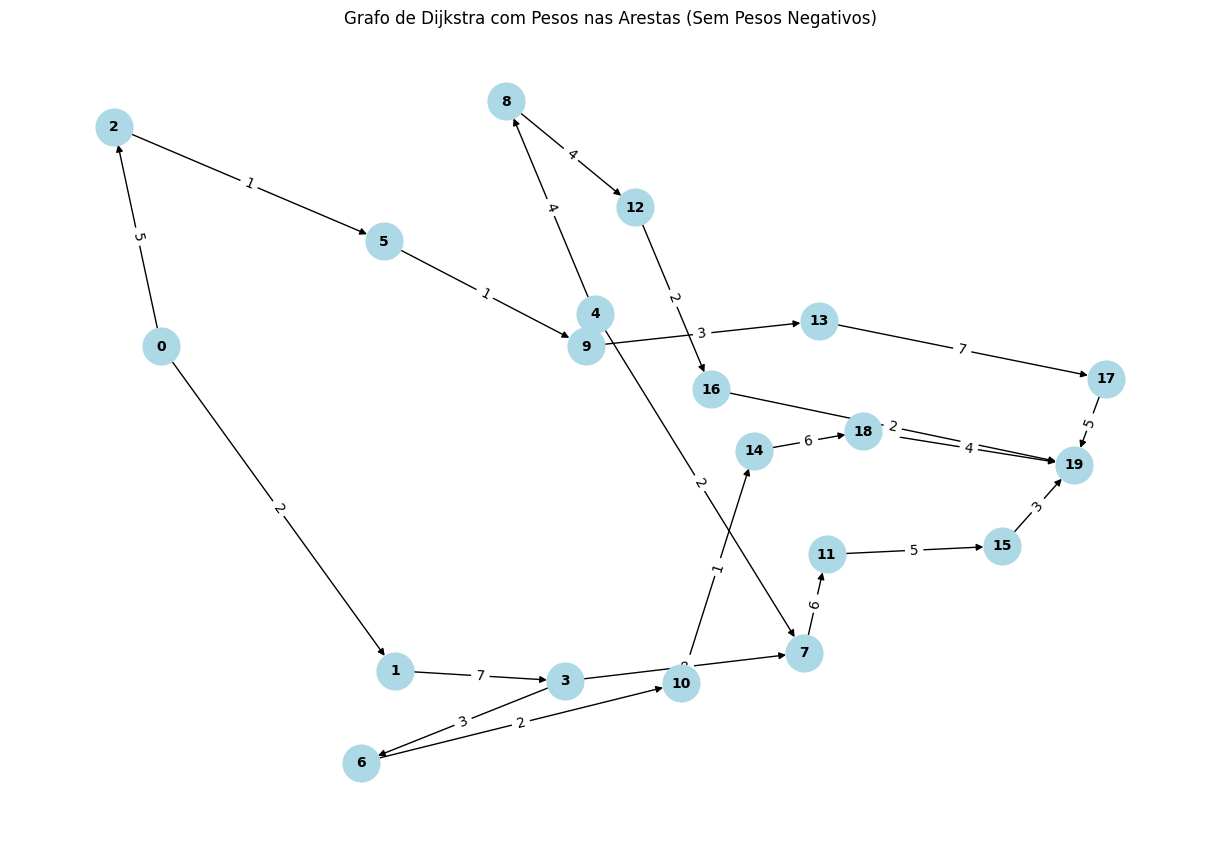

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Função para calcular o caminho mínimo usando Dijkstra
def dijkstra_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage_func():
    mem_usage = memory_usage()
    return mem_usage[0]  # Retorna o primeiro valor da lista de memória usada

# Criar o grafo de exemplo sem arestas com pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, 2), (4, 8, 4), (5, 9, 1),
    (6, 10, 2), (7, 11, 6), (8, 12, 4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, 2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, 5), (18, 19, 4)
]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage_func()

# Executando o algoritmo de Dijkstra
distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
dijkstra_time = time.time() - start_time
dijkstra_memory = memory_usage_func() - start_memory

# Obter o caminho de menor custo
dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)

# Exibir os resultados
print(f"Algoritmo de Dijkstra:")
print(f"Tempo de execução: {dijkstra_time:.6f} segundos")
print(f"Memória usada: {dijkstra_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_dijkstra.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if dijkstra_path:
    print(" -> ".join(map(str, dijkstra_path)))
else:
    print("Não existe um caminho válido.")

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo de Dijkstra com Pesos nas Arestas (Sem Pesos Negativos)")
plt.show()


Algoritmo de Dijkstra:
Tempo de execução: 0.105838 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 5: 6
Nó 6: 12
Nó 7: 17
Nó 4: inf
Nó 8: inf
Nó 9: 7
Nó 10: 14
Nó 11: 23
Nó 12: inf
Nó 13: 10
Nó 14: 15
Nó 15: 28
Nó 16: inf
Nó 17: 17
Nó 18: 21
Nó 19: 22

Caminho de menor custo:
0 -> 2 -> 5 -> 9 -> 13 -> 17 -> 19


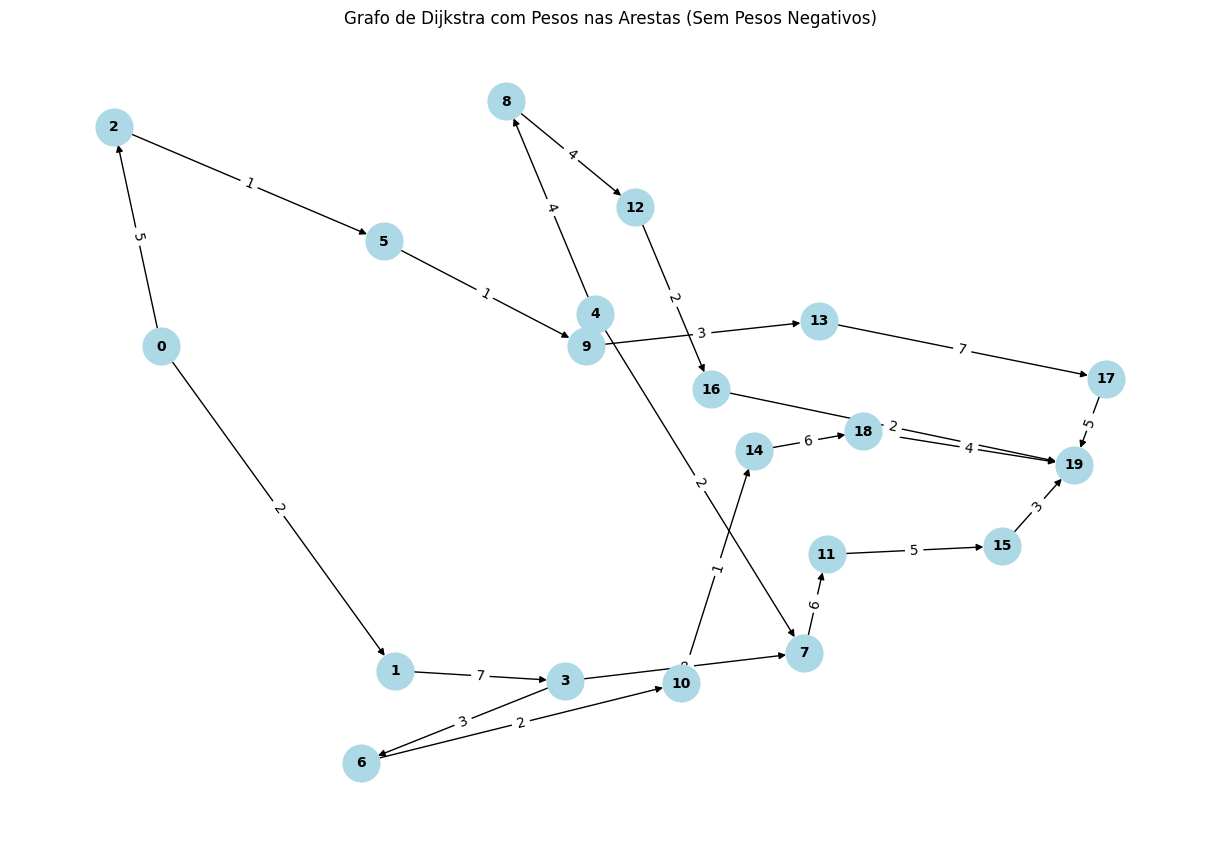

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Função para calcular o caminho mínimo usando Dijkstra
def dijkstra_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória
def memory_usage_func():
    mem_usage = memory_usage()
    return mem_usage[0]  # Retorna o primeiro valor da lista de memória usada

# Criar o grafo de exemplo sem arestas com pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, 2), (4, 8, 4), (5, 9, 1),
    (6, 10, 2), (7, 11, 6), (8, 12, 4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, 2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, 5), (18, 19, 4)
]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo e memória para o algoritmo de Dijkstra
start_time = time.time()
start_memory = memory_usage_func()

# Executando o algoritmo de Dijkstra
distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)
dijkstra_time = time.time() - start_time
dijkstra_memory = memory_usage_func() - start_memory

# Obter o caminho de menor custo
dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)

# Exibir os resultados
print(f"Algoritmo de Dijkstra:")
print(f"Tempo de execução: {dijkstra_time:.6f} segundos")
print(f"Memória usada: {dijkstra_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_dijkstra.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if dijkstra_path:
    print(" -> ".join(map(str, dijkstra_path)))
else:
    print("Não existe um caminho válido.")

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo de Dijkstra com Pesos nas Arestas (Sem Pesos Negativos)")
plt.show()


Algoritmo de Dijkstra:
Tempo de execução: 0.102270 segundos
Memória usada: 0.00 MB

Distâncias mínimas de cada nó a partir do nó inicial:
Nó 0: 0
Nó 1: 2
Nó 2: 5
Nó 3: 9
Nó 5: 6
Nó 6: 12
Nó 7: 17
Nó 4: inf
Nó 8: inf
Nó 9: 7
Nó 10: 14
Nó 11: 23
Nó 12: inf
Nó 13: 10
Nó 14: 15
Nó 15: 28
Nó 16: inf
Nó 17: 17
Nó 18: 21
Nó 19: 22

Caminho de menor custo:
0 -> 2 -> 5 -> 9 -> 13 -> 17 -> 19


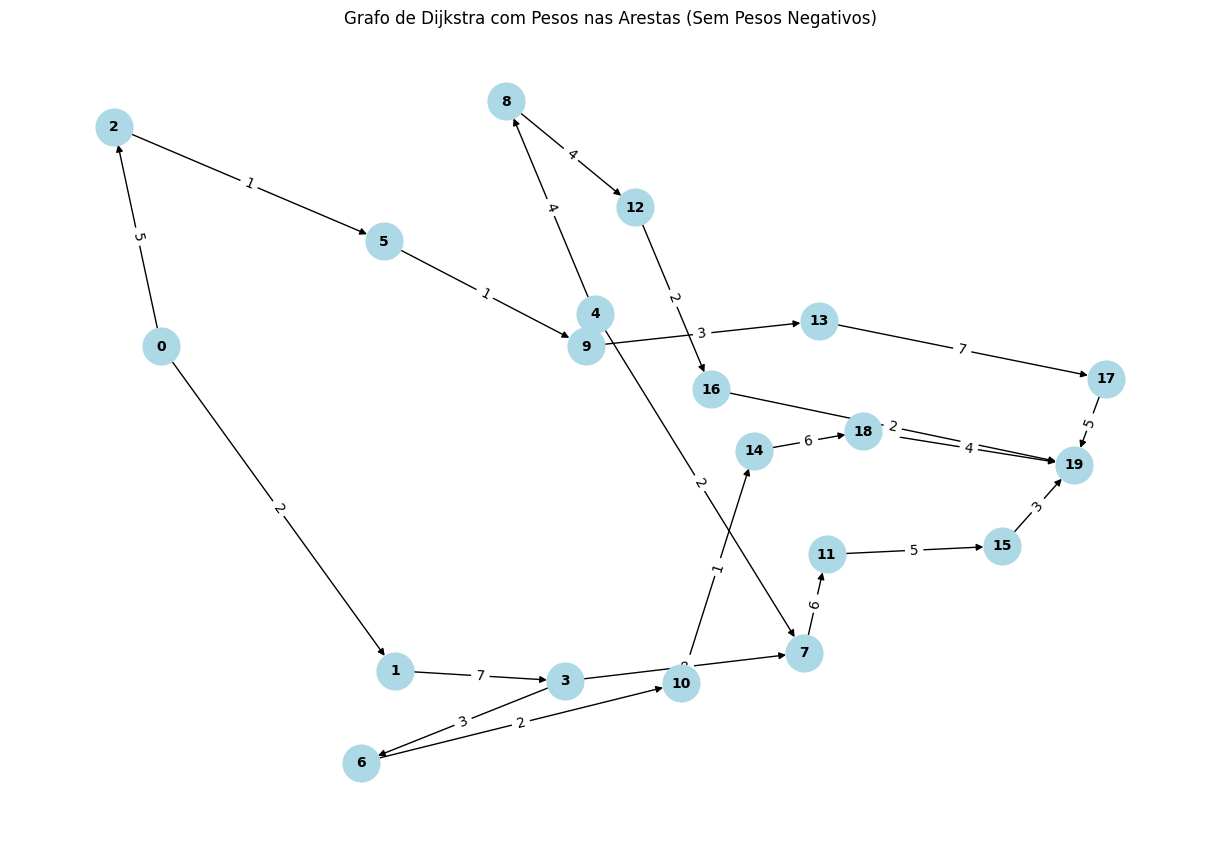

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

# Função para calcular o caminho mínimo usando Dijkstra
def dijkstra_algorithm(graph, start_node):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[start_node] = 0
    predecessors = {node: None for node in graph.nodes()}
    unvisited_nodes = set(graph.nodes())

    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor].get("weight", 1)
            new_distance = distances[current_node] + edge_weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node

    return distances, predecessors

# Função para reconstruir o caminho de menor custo
def get_shortest_path(predecessors, start_node, target_node):
    path = []
    current_node = target_node
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
    path.reverse()
    return path if path[0] == start_node else None

# Função para medir o uso de memória, adaptado para capturar a memória durante a execução do Dijkstra
def measure_memory_usage(func, *args, **kwargs):
    # Use memory_profiler para medir o uso de memória
    mem_usage = memory_usage((func, args, kwargs))
    return mem_usage

# Criar o grafo de exemplo sem arestas com pesos negativos
G = nx.DiGraph()
edges = [
    (0, 1, 2), (0, 2, 5), (1, 3, 7), (2, 5, 1),
    (3, 6, 3), (3, 7, 8), (4, 7, 2), (4, 8, 4), (5, 9, 1),
    (6, 10, 2), (7, 11, 6), (8, 12, 4), (9, 13, 3), (10, 14, 1),
    (11, 15, 5), (12, 16, 2), (13, 17, 7), (14, 18, 6), (15, 19, 3),
    (16, 19, 2), (17, 19, 5), (18, 19, 4)
]
G.add_weighted_edges_from(edges)

# Definir o nó inicial e final
start_node = 0
target_node = 19

# Medindo o tempo de execução e a memória usada para o algoritmo de Dijkstra
start_time = time.time()

# Usar a função para medir o uso de memória durante a execução do algoritmo
mem_usage_before = memory_usage()[0]

# Executando o algoritmo de Dijkstra
distances_dijkstra, predecessors_dijkstra = dijkstra_algorithm(G, start_node)

# Medindo o tempo e a memória após a execução
dijkstra_time = time.time() - start_time
mem_usage_after = memory_usage()[0]
dijkstra_memory = mem_usage_after - mem_usage_before

# Obter o caminho de menor custo
dijkstra_path = get_shortest_path(predecessors_dijkstra, start_node, target_node)

# Exibir os resultados
print(f"Algoritmo de Dijkstra:")
print(f"Tempo de execução: {dijkstra_time:.6f} segundos")
print(f"Memória usada: {dijkstra_memory:.2f} MB")
print("\nDistâncias mínimas de cada nó a partir do nó inicial:")
for node, distance in distances_dijkstra.items():
    print(f"Nó {node}: {distance}")

print("\nCaminho de menor custo:")
if dijkstra_path:
    print(" -> ".join(map(str, dijkstra_path)))
else:
    print("Não existe um caminho válido.")

# Exibir o grafo com as distâncias e os valores das arestas
pos = nx.spring_layout(G, seed=42)  # Layout para o grafo
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Exibir o título e o gráfico
plt.title("Grafo de Dijkstra com Pesos nas Arestas (Sem Pesos Negativos)")
plt.show()
